# Predicting School District Performance
The Data Schoolers - Ashwin Deo, Aasta Frascati-Robinson, Bhanu Kanna, Brendan Law

#### Overview and Motivation
What factors have an impact on school district performance?  We seek to learn if we can predict graduation rate based upon numerous school district characteristics.  We look to understand what factors have little or no impact on performance. We also strive to classify school districts by custom team-built peer school district grouping rather than solely geographical grouping by nation, state, and school district, which would include factors like total students, student/teacher ratio, percent of children in poverty, district type, location, etc.  We used the most current national graduation data found, which was for the school year 2009-2010.  We have kept the dataset years consistent across data sources.

The goal of predicting school district performance based on school environment is to inform parents and interested citizens of what factors in school districts influence key success indicators such as graduation rate.  Identifying these factors would help school districts look at potential opportunities to improve.  This topic was selected because of a passion for using technology to enhance education and desire to give back to the education communities that have helped shape us.  One team member would love to work in educational data science in the future.

Open education data is now being provided via several national, state, and local government portals.  It is often up to the end user to piece together datasets across these portals to answer their questions, which is not something that a typical parent or interested citizen has the time or expertise to pursue.  Instead, the data science community can support these users by melding these datasets and answering important education questions.

#### Related Work
Dekker, Pechenizkiy, and Vleeshouwers built multiple models to predict Eindhoven University of Technology freshman dropout (2009, <i>Educational Data Mining</i>).  We referenced this work to identify what types of models might be applicable for interpreting education data.

Start with the standard imports we have used for every notebook in this class.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Data Loading

Each of the datasheets downloaded from ELSI had download metadata on the top of them and total and key information on the bottom of them that were not data rows. This metadata, total, and key information was manually deleted before import. Some of the files had ="0" instead of 0 in the cells. This was found/replaced before import using the sed -i '' 's/="0"/0/g' *.csv command from the terminal.

In [2]:
#CITATION: This is the data from National Center for Education Statistics on Schools
#School districts for all 50 states and Washington, D.C.
#http://nces.ed.gov/ccd/elsi/
#Data Source: U.S. Department of Education National Center for Education Statistics Common Core of Data (CCD) "Local Education Agency (School District) Universe Survey" 2009-10 v.2a  2013-14 v.1a; "Public Elementary/Secondary School Universe Survey" 2009-10 v.2a; "Survey of Local Government Finances School Systems (F-33)" 2009-10 (FY 2010) v.1a.
#KEY:
#† indicates that the data are not applicable.
#– indicates that the data are missing.
#‡ indicates that the data do not meet NCES data quality standards.

districtinformation = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS Information Tab.csv", dtype=np.str)
districtcharacteristicsa = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS Characteristics Tab.csv", dtype=np.str)
districtenrollments = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS Enrollments Tab.csv", dtype=np.str)
districtenrollmentK3 = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS EnrollK3 Tab.csv", dtype=np.str)
districtenrollment48 = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS Enroll48 Tab.csv", dtype=np.str)
districtenrollment912 = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS Enroll912 Tab.csv", dtype=np.str)
districtteacherstaff = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS TeacherStaff Tab.csv", dtype=np.str)
districtgeneralfinance = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS GeneralFinance Tab.csv", dtype=np.str)
districtrevenue = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS Revenue Tab.csv", dtype=np.str)
districtexpenditures = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS Expenditures Tab.csv", dtype=np.str)

#Data Source: Local Education Agency (School District) Universe Survey Dropout and Completion Data: 2009-10 v.1a.
#KEY:
#-1 indicates that data is missing
#-2 indicates that data is not applicable
#-3 indicates that data was suppressed because of low count disclosure protection
#-4 indicates that data was supporessed because of high count disclosure protection
#-9 indicates that data was supporessed because data quality was poor

#SURVYEAR     1        AN       School year
#FIPST        2        AN       Two Digit American National Standards Institute (ANSI) State Code.
#
#                             	01  =  Alabama        02  =  Alaska          04  =  Arizona
#                             	05  =  Arkansas       06  =  California      08  =  Colorado
#                             	09  =  Connecticut    10  =  Delaware        11  =  District of Columbia
#                             	12  =  Florida        13  =  Georgia         15  =  Hawaii
#                             	16  =  Idaho          17  =  Illinois        18  =  Indiana
#                             	19  =  Iowa           20  =  Kansas          21  =  Kentucky
#                             	22  =  Louisiana      23  =  Maine           24  =  Maryland
#                             	25  =  Massachusetts  26  =  Michigan        27  =  Minnesota
#                             	28  =  Mississippi    29  =  Missouri        30  =  Montana
#                             	31  =  Nebraska       32  =  Nevada          33  =  New Hampshire
#                             	34  =  New Jersey     35  =  New Mexico      36  =  New York
#                             	37  =  North Carolina 38  =  North Dakota    39  =  Ohio
#                             	40  =  Oklahoma       41  =  Oregon          42  =  Pennsylvania
#                             	44  =  Rhode Island   45  =  South Carolina  46  =  South Dakota
#                             	47  =  Tennessee      48  =  Texas           49  =  Utah
#                             	50  =  Vermont        51  =  Virginia        53  =  Washington
#                             	54  =  West Virginia  55  =  Wisconsin       56  =  Wyoming
#                             	58  =  DOD Dependents Schools-Overseas    
#                             	59  =  Bureau of Indian Education
#                             	60  =  American Samoa 61  =  DOD Dependents School-Domestic
#                             	66  =  Guam           69  =  Northern Marianas
#                             	72  =  Puerto Rico    78  =  Virgin Islands
#
#LEAID        3        AN       NCES Assigned Local Education Agency Identification Number
#TOTD912      4        N        Total Dropouts, Grades 9–12
#EBS912       5        N        Dropout Enrollment Base, Grades 9–12
#DRP912       6*       N        Dropout Rate, Grades 9–12
#TOTDPL       7        N        Total Diploma Count
#AFGEB        8        N        Total Averaged Freshman Graduation Rate (AFGR) Enrollment Base
#AFGR         9*       N        Total Averaged Freshmen Graduation Rate (AFGR)
#TOTOHC      10        N        Total Other High School Completion Certificate (OHC) Recipients

districtdropoutscompleters = pd.read_csv("data/rawdata/districts/2009-2010 DISTRICTS DropoutsCompleters.txt", dtype=np.str, delim_whitespace=True)

Check the lengths of the datasets to see if we have a row for every school district.  We have more school district IDs in districtinformation than we have school district characteristics, and we have more rows of graduation information than we have school district characteristics.  Rows without school district characteristics will later be dropped.

In [3]:
print len(districtinformation)
print len(districtcharacteristicsa)
print len(districtenrollments)
print len(districtenrollmentK3)
print len(districtenrollment48)
print len(districtenrollment912)
print len(districtteacherstaff)
print len(districtgeneralfinance)
print len(districtrevenue)
print len(districtexpenditures)
print len(districtdropoutscompleters)

19023
17916
17916
17916
17916
17916
17916
17916
17916
17916
18439


Drop all of the duplicate columns.

In [4]:
#Duplicate columns are:
#Agency Name
#State Name [District] Latest available year
#Agency ID - NCES Assigned [District] Latest available year
districtenrollments = districtenrollments.drop(districtenrollments.columns[[0, 1, 2]], 1)
districtenrollmentK3 = districtenrollmentK3.drop(districtenrollmentK3.columns[[0, 1, 2]], 1)
districtenrollment48 = districtenrollment48.drop(districtenrollment48.columns[[0, 1, 2]], 1)
districtenrollment912 = districtenrollment912.drop(districtenrollment912.columns[[0, 1, 2]], 1)
districtteacherstaff = districtteacherstaff.drop(districtteacherstaff.columns[[0, 1, 2]], 1)
districtgeneralfinance = districtgeneralfinance.drop(districtgeneralfinance.columns[[0, 1, 2]], 1)
districtrevenue = districtrevenue.drop(districtrevenue.columns[[0, 1, 2]], 1)
districtexpenditures = districtexpenditures.drop(districtexpenditures.columns[[0, 1, 2]], 1)

Join all of the school district datasets. The datasets districtinformation and districtdropoutscompleters need special treatment, as they have more rows for the school districts than the other datasets. All of the other datasets can be joined by ID without issue.

In [5]:
#Join the datasets that can be joined without issue.
joineddistrict = districtcharacteristicsa.join([districtenrollments, districtenrollmentK3, districtenrollment48, districtenrollment912, districtteacherstaff, districtgeneralfinance, districtrevenue, districtexpenditures])

#Clean up an extra hidden character in the Agency Name column
joineddistrict = joineddistrict.rename(columns={'﻿Agency Name': 'Agency Name'})
districtinformation = districtinformation.rename(columns={'﻿Agency Name': 'Agency Name'})

#Merge to the districtinformation dataset
joineddistrict = districtinformation.merge(joineddistrict, 'left', 'Agency ID - NCES Assigned [District] Latest available year', suffixes=('', '_DEL'))

#Need to get rid of Excel syntax ="" from the school district ID column so it can be joined successfully
joineddistrict['Agency ID - NCES Assigned [District] Latest available year'] = joineddistrict['Agency ID - NCES Assigned [District] Latest available year'].map(lambda x: str(x).lstrip('="').rstrip('"'))

#Rename the LEAID column so it can be merged with the joineddistrict dataset
districtdropoutscompleters = districtdropoutscompleters.rename(columns={'LEAID': 'Agency ID - NCES Assigned [District] Latest available year'})

#Merge to the joineddistrict dataset
joineddistrict = joineddistrict.merge(districtdropoutscompleters, 'left', 'Agency ID - NCES Assigned [District] Latest available year', suffixes=('', '_DEL'))

#If by chance any rows have NaN, replace with the ELSI standard for missing data '–'
joineddistrict = joineddistrict.fillna('–')
joineddistrict = joineddistrict.replace('nan', '–')

joineddistrict.head()

Agency Name State Name [District] Latest available year State Name [District] 2009-10 State Abbr [District] Latest available year                     Agency Name [District] 2009-10 Agency ID - NCES Assigned [District] Latest available year County Name [District] 2009-10 County Number [District] 2009-10 Race/Ethnicity Category [District] 2009-10 ANSI/FIPS State Code [District] Latest available year  \
0                  100 LEGACY ACADEMY CHARTER SCHOOL                                  New Jersey                             †                                         NJ                                                   †                                            3400743                                      †                                †                                          †                                                 34      
1                   21ST CENTURY CHARTER SCH OF GARY                                     Indiana                       Indiana                                         IN                    21ST CENTURY CHARTER SCH OF GARY                                            1800046                          MARION COUNTY                            18097                      Reported 5 categories                                                 18      
2                              21ST CENTURY CYBER CS                                Pennsylvania                  Pennsylvania                                         PA                               21ST CENTURY CYBER CS                                            4200091                         CHESTER COUNTY                            42029                      Reported 5 categories                                                 42      
3             21ST CENTURY PREPARATORY SCHOOL AGENCY                                   Wisconsin                     Wisconsin                                         WI              21ST CENTURY PREPARATORY SCHOOL AGENCY                                            5500045                          RACINE COUNTY                            55101                      Reported 5 categories                                                 55      
4  4-WINDS ACADEMY  INCORPORATED DBA 4-WINDS ACADEMY                                     Arizona                       Arizona                                         AZ   4-WINDS ACADEMY  INCORPORATED DBA 4-WINDS ACADEMY                                            0400380                          APACHE COUNTY                         ="04001"                      Reported 5 categories                                              ="04"      

  Total Number Operational Schools [Public School] 2009-10 Total Number Operational Charter Schools [Public School] 2009-10 Total Number of Public Schools [Public School] 2009-10 Years District Reported Data [District] Latest available year Years District Did Not Report Data [District] Latest available year Location Address [District] 2013-14 Location City [District] 2013-14 Location State Abbr [District] 2013-14 Location ZIP [District] 2013-14 Location ZIP4 [District] 2013-14  \
0                                                  †                                                        †                                                                †                                              2010-2013                                                     1986-2009                                         75 MORTON ST                           NEWARK                                    NJ                         ="07103"                                †   
1                                                  1                                                        1                                                                1                                              2004-2013                                                     1986-2003                                    556 WASHINGTON ST                             GARY                       

If we did this correctly, we should still have 19023 rows as we did from the previous step.

In [6]:
print len(joineddistrict)

19023


### Data Cleaning

Now we start cleaning the data.

In [7]:
cleaneddistrict = joineddistrict.copy(deep=True)

The dropouts and completers dataset has flags for different types of missing data (NAs, missing, etc.), including -1, -2, -3, -4, -9. Set all of these to missing data flag instead.

In [8]:
cleaneddistrict['TOTD912'] = cleaneddistrict['TOTD912'].replace('-1', '–')
cleaneddistrict['TOTD912'] = cleaneddistrict['TOTD912'].replace('-2', '–')
cleaneddistrict['TOTD912'] = cleaneddistrict['TOTD912'].replace('-3', '–')
cleaneddistrict['TOTD912'] = cleaneddistrict['TOTD912'].replace('-4', '–')
cleaneddistrict['TOTD912'] = cleaneddistrict['TOTD912'].replace('-9', '–')

cleaneddistrict['EBS912'] = cleaneddistrict['EBS912'].replace('-2', '–')

cleaneddistrict['DRP912'] = cleaneddistrict['DRP912'].replace('-1.0', '–')
cleaneddistrict['DRP912'] = cleaneddistrict['DRP912'].replace('-2.0', '–')
cleaneddistrict['DRP912'] = cleaneddistrict['DRP912'].replace('-3.0', '–')
cleaneddistrict['DRP912'] = cleaneddistrict['DRP912'].replace('-4.0', '–')
cleaneddistrict['DRP912'] = cleaneddistrict['DRP912'].replace('-9.0', '–')

cleaneddistrict['TOTDPL'] = cleaneddistrict['TOTDPL'].replace('-1', '–')
cleaneddistrict['TOTDPL'] = cleaneddistrict['TOTDPL'].replace('-2', '–')
cleaneddistrict['TOTDPL'] = cleaneddistrict['TOTDPL'].replace('-9', '–')

cleaneddistrict['AFGEB'] = cleaneddistrict['AFGEB'].replace('-1', '–')
cleaneddistrict['AFGEB'] = cleaneddistrict['AFGEB'].replace('-2', '–')

cleaneddistrict['AFGR'] = cleaneddistrict['AFGR'].replace('-1.0', '–')
cleaneddistrict['AFGR'] = cleaneddistrict['AFGR'].replace('-2.0', '–')
cleaneddistrict['AFGR'] = cleaneddistrict['AFGR'].replace('-9.0', '–')

cleaneddistrict['TOTOHC'] = cleaneddistrict['TOTOHC'].replace('-1', '–')
cleaneddistrict['TOTOHC'] = cleaneddistrict['TOTOHC'].replace('-2', '–')
cleaneddistrict['TOTOHC'] = cleaneddistrict['TOTOHC'].replace('-3', '–')
cleaneddistrict['TOTOHC'] = cleaneddistrict['TOTOHC'].replace('-9', '–')

Some of the columns had Excel style syntax in them ="".  We need to get rid of it.

In [9]:
#Need to get rid of Excel syntax ="" from some of the columns
for i, col in enumerate(cleaneddistrict.columns):
    cleaneddistrict[col] = cleaneddistrict[col].map(lambda x: str(x).lstrip('="').rstrip('"'))

We need to replace the flags for missing, NA, and bad quality data with blanks that can later be turned into NaN for float columns.

In [10]:
# Replacing Missing Data / NA / Bad Quality data with blank, later to be turned into NaN for float columns
# CITATIOIN : http://pandas.pydata.org/pandas-docs/version/0.15.2/missing_data.html

cleaneddistrict = cleaneddistrict.replace('\xe2\x80\x93', '') # Replace "-" (Missing Data) with blank
cleaneddistrict = cleaneddistrict.replace('\xe2\x80\xa0', '') # Replace "†" (Not Applicable) with blank
cleaneddistrict = cleaneddistrict.replace('\xe2\x80\xa1', '') # Replace "‡" (Bad Quality) with blank

Turn all of the numerical columns into floats.  Replace the blanks from the previous step with NaN.

In [11]:
countcolumns = ['Local Rev. - Individual & Corp. Income Taxes (T40) [District Finance] 2009-10','Local Rev. - All Other Taxes (T99) [District Finance] 2009-10','Local Rev. - Parent Government Contributions (T02) [District Finance] 2009-10','Local Rev. - Revenue- Cities and Counties (D23) [District Finance] 2009-10','Local Rev. - Revenue- Other School Systems (D11) [District Finance] 2009-10','Local Rev. - Tuition Fees- Pupils and Parents (A07) [District Finance] 2009-10','Local Rev. - Transp. Fees- Pupils and Parents (A08) [District Finance] 2009-10','Local Rev. - School Lunch Revenues (A09) [District Finance] 2009-10','Local Rev. - Textbook Sales and Rentals (A11) [District Finance] 2009-10','Local Rev. - Student Activity Receipts (A13) [District Finance] 2009-10','Local Rev. - Other Sales and Service Rev. (A20) [District Finance] 2009-10','Local Rev. - Student Fees Non-Specified (A15) [District Finance] 2009-10','Local Rev. - Interest Earnings (U22) [District Finance] 2009-10','Local Rev. - Miscellaneous Other Local Rev. (U97) [District Finance] 2009-10','Local Rev. - Special Processing (C24) [District Finance] 2009-10','Local Rev. - Rents and Royalties (A40) [District Finance] 2009-10','Local Rev. - Sale of Property (U11) [District Finance] 2009-10','Local Rev. - Fines and Forfeits (U30) [District Finance] 2009-10','Local Rev. - Private Contributions (U50) [District Finance] 2009-10','State Rev. - General Formula Assistance (C01) [District Finance] 2009-10','State Rev. - Special Education Programs (C05) [District Finance] 2009-10','State Rev. - Transportation Programs (C12) [District Finance] 2009-10','State Rev. - Staff Improvement Programs (C04) [District Finance] 2009-10','State Rev. - Compensat. and Basic Skills Prog. (C06) [District Finance] 2009-10','State Rev. - Vocational Education Programs (C09) [District Finance] 2009-10','State Rev. - Capital Outlay and Debt Serv. Prog. (C11) [District Finance] 2009-10','State Rev. - Bilingual Education Programs (C07) [District Finance] 2009-10','State Rev. - Gifted and Talented Programs (C08) [District Finance] 2009-10','State Rev. - School Lunch Programs (C10) [District Finance] 2009-10','State Rev. - All Other Rev.- State Sources (C13) [District Finance] 2009-10','State Rev. - State Payment for LEA Empl. Benefits (C38) [District Finance] 2009-10','State Rev. - Other State Payments (C39) [District Finance] 2009-10','State Rev. - Non-Specified (C35) [District Finance] 2009-10','Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2009-10','Federal Rev. - Children with Disabilities (C15) [District Finance] 2009-10','Federal Rev. - Child Nutrition Act (C25) [District Finance] 2009-10','Federal Rev. - Eisenhower Math and Science (C16) [District Finance] 2009-10','Federal Rev. - Drug-Free Schools (C17) [District Finance] 2009-10','Federal Rev. - Vocational Education (C19) [District Finance] 2009-10','Federal Rev. - All Other Fed. Aid Through State (C20) [District Finance] 2009-10','Federal Rev. - Nonspecified (C36) [District Finance] 2009-10','Federal Rev. - Impact Aid (PL 815 and 874) (B10) [District Finance] 2009-10','Federal Rev. - Bilingual Education (B11) [District Finance] 2009-10','Federal Rev. - Native American (Ind.) Educ. (B12) [District Finance] 2009-10','Federal Rev. - All Other Federal Aid (B13) [District Finance] 2009-10','Enterprise Operations - Non Instructional (V60) [District Finance] 2009-10','Food Services - Non Instuctional (E11) [District Finance] 2009-10','Instruction Expenditures - Total (E13) [District Finance] 2009-10','Non-Specified - Supp. Serv. Exp. (V85) [District Finance] 2009-10','Other Non Instructional (V65) [District Finance] 2009-10','Total - Gen. Admin.- Supp. Serv. Exp. (E08) [District Finance] 2009-10','Total - Instruct. Staff- Supp. Serv. Exp. (E07) [District Finance] 2009-10','Total - Ops. & Mainten.- Supp. Serv. Exp. (V40) [District Finance] 2009-10','Total - Other Supp. Serv.- Supp. Serv. Exp. (V90) [District Finance] 2009-10','Total - School Admin.- Supp. Serv. Exp. (E09) [District Finance] 2009-10','Total - Student Transp.- Supp. Serv. Exp. (V45) [District Finance] 2009-10','Total - Students- Supp. Serv. Exp. (E17) [District Finance] 2009-10','Salary - Instruction Expenditures (Z33) [District Finance] 2009-10','Salary - Students- Supp. Serv. Exp. (V11) [District Finance] 2009-10','Salary - Instruct. Staff- Supp. Serv. Exp. (V13) [District Finance] 2009-10','Salary - General Admin.- Supp. Serv. Exp. (V15) [District Finance] 2009-10','Salary - School Admin.- Supp. Serv. Exp. (V17) [District Finance] 2009-10','Salary - Ops. & Mainten.- Supp. Serv. Exp. (V21) [District Finance] 2009-10','Salary - Student Transp.- Supp. Serv. Exp. (V23) [District Finance] 2009-10','Salary - Other Supp. Serv.- Supp. Serv. Exp. (V37) [District Finance] 2009-10','Salary - Food Services- Non-Instruction (V29) [District Finance] 2009-10','Employee Benefits - Instruction Expend. (V10) [District Finance] 2009-10','Empl. Benefits - Students- Supp. Serv. Exp. (V12) [District Finance] 2009-10','Empl. Benefits - Instruction- Supp. Serv. Exp. (V14) [District Finance] 2009-10','Empl. Benefits - Gen. Adm.- Supp. Serv. Exp. (V16) [District Finance] 2009-10','Empl. Benefits - Sch. Adm.- Supp. Serv. Exp. (V18) [District Finance] 2009-10','Empl. Benefits - Ops. & Maint.- Supp. Serv. Exp. (V22) [District Finance] 2009-10','Empl. Benefits - Student Trans.- Supp. Serv. Exp. (V24) [District Finance] 2009-10','Empl. Benefits - Other Supp Serv- Supp. Serv. Exp. (V38) [District Finance] 2009-10','Empl. Benefits - Food Services- Non-Instruction (V30) [District Finance] 2009-10','Empl. Benefits - Enterp. Oper.- Non-Instruction (V32) [District Finance] 2009-10','Current Spending - Private Schools (V91) [District Finance] 2009-10','Current Spending - Public Charter Schools (V92) [District Finance] 2009-10','Teacher Salaries - Regular Education Programs (Z35) [District Finance] 2009-10','Teacher Salaries - Special Education Programs (Z36) [District Finance] 2009-10','Teacher Salaries - Vocational Education Programs (Z37) [District Finance] 2009-10','Teacher Salaries - Other Education Programs (Z38) [District Finance] 2009-10','Textbooks for Instruction (V93) [District Finance] 2009-10','Community Services - Non El-Sec (V70) [District Finance] 2009-10','Adult Education - Non El-Sec (V75) [District Finance] 2009-10','Other Expenditures - Non El-Sec (V80) [District Finance] 2009-10','Construction - Capital Outlay (F12) [District Finance] 2009-10','Instructional Equipment - Capital Outlay (K09) [District Finance] 2009-10','Other Equipment - Capital Outlay (K10) [District Finance] 2009-10','Non-specified - Equipment Expenditures (K11) [District Finance] 2009-10','Land & Existing Structures - Capital Outlay (G15) [District Finance] 2009-10','Payments to Local Governments (M12) [District Finance] 2009-10','Payments to State Governments (L12) [District Finance] 2009-10','Interest on School System Indebtedness (I86) [District Finance] 2009-10','Payments to Other School Systems (Q11) [District Finance] 2009-10','FIPST','TOTD912','EBS912','DRP912','TOTDPL','AFGEB','AFGR','TOTOHC','Total Number Operational Schools [Public School] 2009-10', 'Total Number Operational Charter Schools [Public School] 2009-10', 'Total Number of Public Schools [Public School] 2009-10', 'Total Students (UG PK-12) [District] 2009-10', 'PK thru 12th Students [District] 2009-10', 'Ungraded Students [District] 2009-10', 'Total Students [Public School] 2009-10', 'Limited English Proficient (LEP) / English Language Learners (ELL) [District] 2009-10', 'Individualized Education Program Students [District] 2009-10', 'Free Lunch Eligible [Public School] 2009-10', 'Reduced-price Lunch Eligible Students [Public School] 2009-10', 'Total Free and Reduced Lunch Students [Public School] 2009-10', 'Prekindergarten and Kindergarten Students [Public School] 2009-10', 'Grades 1-8 Students [Public School] 2009-10','Grades 9-12 Students [Public School] 2009-10','Prekindergarten Students [Public School] 2009-10','Kindergarten Students [Public School] 2009-10','Grade 1 Students [Public School] 2009-10','Grade 2 Students [Public School] 2009-10','Grade 3 Students [Public School] 2009-10','Grade 4 Students [Public School] 2009-10','Grade 5 Students [Public School] 2009-10','Grade 6 Students [Public School] 2009-10','Grade 7 Students [Public School] 2009-10','Grade 8 Students [Public School] 2009-10','Grade 9 Students [Public School] 2009-10','Grade 10 Students [Public School] 2009-10','Grade 11 Students [Public School] 2009-10','Grade 12 Students [Public School] 2009-10','Ungraded Students [Public School] 2009-10','Male Students [Public School] 2009-10','Female Students [Public School] 2009-10','American Indian/Alaska Native Students [Public School] 2009-10','Asian or Asian/Pacific Islander Students [Public School] 2009-10','Hispanic Students [Public School] 2009-10','Black Students [Public School] 2009-10','White Students [Public School] 2009-10','Hawaiian Nat./Pacific Isl. Students [Public School] 2009-10','Two or More Races Students [Public School] 2009-10','Total Race/Ethnicity [Public School] 2009-10','Prekindergarten Students - American Indian/Alaska Native - male [Public School] 2009-10','Prekindergarten Students - American Indian/Alaska Native - female [Public School] 2009-10','Prekindergarten Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Prekindergarten Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Prekindergarten Students - Hispanic - male [Public School] 2009-10','Prekindergarten Students - Hispanic - female [Public School] 2009-10','Prekindergarten Students - Black - male [Public School] 2009-10','Prekindergarten Students - Black - female [Public School] 2009-10','Prekindergarten Students - White - male [Public School] 2009-10','Prekindergarten Students - White - female [Public School] 2009-10','Prekindergarten Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Prekindergarten Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Prekindergarten Students - Two or More Races - male [Public School] 2009-10','Prekindergarten Students - Two or More Races - female [Public School] 2009-10','Kindergarten Students - American Indian/Alaska Native - male [Public School] 2009-10','Kindergarten Students - American Indian/Alaska Native - female [Public School] 2009-10','Kindergarten Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Kindergarten Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Kindergarten Students - Hispanic - male [Public School] 2009-10','Kindergarten Students - Hispanic - female [Public School] 2009-10','Kindergarten Students - Black - male [Public School] 2009-10','Kindergarten Students - Black - female [Public School] 2009-10','Kindergarten Students - White - male [Public School] 2009-10','Kindergarten Students - White - female [Public School] 2009-10','Kindergarten Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Kindergarten Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Kindergarten Students - Two or More Races - male [Public School] 2009-10','Kindergarten Students - Two or More Races - female [Public School] 2009-10','Grade 1 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 1 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 1 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 1 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 1 Students - Hispanic - male [Public School] 2009-10','Grade 1 Students - Hispanic - female [Public School] 2009-10','Grade 1 Students - Black - male [Public School] 2009-10','Grade 1 Students - Black - female [Public School] 2009-10','Grade 1 Students - White - male [Public School] 2009-10','Grade 1 Students - White - female [Public School] 2009-10','Grade 1 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 1 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 1 Students - Two or More Races - male [Public School] 2009-10','Grade 1 Students - Two or More Races - female [Public School] 2009-10','Grade 2 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 2 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 2 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 2 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 2 Students - Hispanic - male [Public School] 2009-10','Grade 2 Students - Hispanic - female [Public School] 2009-10','Grade 2 Students - Black - male [Public School] 2009-10','Grade 2 Students - Black - female [Public School] 2009-10','Grade 2 Students - White - male [Public School] 2009-10','Grade 2 Students - White - female [Public School] 2009-10','Grade 2 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 2 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 2 Students - Two or More Races - male [Public School] 2009-10','Grade 2 Students - Two or More Races - female [Public School] 2009-10','Grade 3 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 3 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 3 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 3 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 3 Students - Hispanic - male [Public School] 2009-10','Grade 3 Students - Hispanic - female [Public School] 2009-10','Grade 3 Students - Black - male [Public School] 2009-10','Grade 3 Students - Black - female [Public School] 2009-10','Grade 3 Students - White - male [Public School] 2009-10','Grade 3 Students - White - female [Public School] 2009-10','Grade 3 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 3 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 3 Students - Two or More Races - male [Public School] 2009-10','Grade 3 Students - Two or More Races - female [Public School] 2009-10','Grade 4 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 4 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 4 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 4 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 4  Students - Hispanic - male [Public School] 2009-10','Grade 4 Students - Hispanic - female [Public School] 2009-10','Grade 4 Students - Black - male [Public School] 2009-10','Grade 4 Students - Black - female [Public School] 2009-10','Grade 4 Students - White - male [Public School] 2009-10','Grade 4 Students - White - female [Public School] 2009-10','Grade 4 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 4 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 4 Students - Two or More Races - male [Public School] 2009-10','Grade 4 Students - Two or More Races - female [Public School] 2009-10','Grade 5 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 5 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 5 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 5 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 5 Students - Hispanic - male [Public School] 2009-10','Grade 5 Students - Hispanic - female [Public School] 2009-10','Grade 5 Students - Black - male [Public School] 2009-10','Grade 5 Students - Black - female [Public School] 2009-10','Grade 5 Students - White - male [Public School] 2009-10','Grade 5 Students - White - female [Public School] 2009-10','Grade 5 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 5 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 5 Students - Two or More Races - male [Public School] 2009-10','Grade 5 Students - Two or More Races - female [Public School] 2009-10','Grade 6 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 6 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 6 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 6 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 6 Students - Hispanic - male [Public School] 2009-10','Grade 6 Students - Hispanic - female [Public School] 2009-10','Grade 6 Students - Black - male [Public School] 2009-10','Grade 6 Students - Black - female [Public School] 2009-10','Grade 6 Students - White - male [Public School] 2009-10','Grade 6 Students - White - female [Public School] 2009-10','Grade 6 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 6 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 6  Students- Two or More Races - male [Public School] 2009-10','Grade 6 Students - Two or More Races - female [Public School] 2009-10','Grade 7 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 7 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 7 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 7 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 7 Students - Hispanic - male [Public School] 2009-10','Grade 7 Students - Hispanic - female [Public School] 2009-10','Grade 7 Students - Black - male [Public School] 2009-10','Grade 7 Students - Black - female [Public School] 2009-10', 'Grade 7 Students - White - male [Public School] 2009-10','Grade 7 Students - White - female [Public School] 2009-10','Grade 7 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 7 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 7 Students - Two or More Races - male [Public School] 2009-10','Grade 7 Students - Two or More Races - female [Public School] 2009-10','Grade 8 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 8 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 8 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 8 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 8  Students- Hispanic - male [Public School] 2009-10','Grade 8 Students - Hispanic - female [Public School] 2009-10','Grade 8 Students - Black - male [Public School] 2009-10','Grade 8 Students - Black - female [Public School] 2009-10','Grade 8 Students - White - male [Public School] 2009-10','Grade 8 Students - White - female [Public School] 2009-10','Grade 8 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 8 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 8 Students - Two or More Races - male [Public School] 2009-10','Grade 8 Students - Two or More Races - female [Public School] 2009-10','Grade 9 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 9 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 9 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 9 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 9 Students - Hispanic - male [Public School] 2009-10','Grade 9 Students - Hispanic - female [Public School] 2009-10','Grade 9 Students - Black - male [Public School] 2009-10','Grade 9 Students - Black - female [Public School] 2009-10','Grade 9 Students - White - male [Public School] 2009-10','Grade 9 Students - White - female [Public School] 2009-10','Grade 9 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 9 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 9 Students - Two or More Races - male [Public School] 2009-10','Grade 9 Students - Two or More Races - female [Public School] 2009-10','Grade 10 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 10 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 10 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 10 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 10 Students - Hispanic - male [Public School] 2009-10','Grade 10 Students - Hispanic - female [Public School] 2009-10','Grade 10 Students - Black - male [Public School] 2009-10','Grade 10 Students - Black - female [Public School] 2009-10','Grade 10 Students - White - male [Public School] 2009-10','Grade 10 Students - White - female [Public School] 2009-10','Grade 10 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 10 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 10 Students - Two or More Races - male [Public School] 2009-10','Grade 10 Students - Two or More Races - female [Public School] 2009-10','Grade 11 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 11 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 11 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 11 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 11 Students - Hispanic - male [Public School] 2009-10','Grade 11 Students - Hispanic - female [Public School] 2009-10','Grade 11 Students - Black - male [Public School] 2009-10','Grade 11 Students - Black - female [Public School] 2009-10','Grade 11 Students - White - male [Public School] 2009-10','Grade 11 Students - White - female [Public School] 2009-10','Grade 11 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 11 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 11 Students - Two or More Races - male [Public School] 2009-10','Grade 11 Students - Two or More Races - female [Public School] 2009-10','Grade 12 Students - American Indian/Alaska Native - male [Public School] 2009-10','Grade 12 Students - American Indian/Alaska Native - female [Public School] 2009-10','Grade 12 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Grade 12 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Grade 12 Students - Hispanic - male [Public School] 2009-10','Grade 12 Students - Hispanic - female [Public School] 2009-10','Grade 12 Students - Black - male [Public School] 2009-10','Grade 12 Students - Black - female [Public School] 2009-10','Grade 12 Students - White - male [Public School] 2009-10','Grade 12 Students - White - female [Public School] 2009-10','Grade 12 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Grade 12 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Grade 12 Students - Two or More Races - male [Public School] 2009-10','Grade 12 Students - Two or More Races - female [Public School] 2009-10','Ungraded Students - American Indian/Alaska Native - male [Public School] 2009-10','Ungraded  Students- American Indian/Alaska Native - female [Public School] 2009-10','Ungraded Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10','Ungraded Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10','Ungraded Students - Hispanic - male [Public School] 2009-10','Ungraded Students - Hispanic - female [Public School] 2009-10','Ungraded Students - Black - male [Public School] 2009-10','Ungraded Students - Black - female [Public School] 2009-10','Ungraded Students - White - male [Public School] 2009-10','Ungraded Students - White - female [Public School] 2009-10','Ungraded Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10','Ungraded Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10','Ungraded Students - Two or More Races - male [Public School] 2009-10','Ungraded Students - Two or More Races - female [Public School] 2009-10','Full-Time Equivalent (FTE) Teachers [District] 2009-10','Full-Time Equivalent (FTE) Teachers [Public School] 2009-10','Pupil/Teacher Ratio [District] 2009-10','Pupil/Teacher Ratio [Public School] 2009-10','Prekindergarten Teachers [District] 2009-10','Kindergarten Teachers [District] 2009-10','Elementary Teachers [District] 2009-10','Secondary Teachers [District] 2009-10','Ungraded Teachers [District] 2009-10','Total Staff [District] 2009-10','Instructional Aides [District] 2009-10','Instructional Coordinators [District] 2009-10','Elementary Guidance Counselors [District] 2009-10','Secondary Guidance Counselors [District] 2009-10','Other Guidance Counselors [District] 2009-10','Total Guidance Counselors [District] 2009-10','Librarians/Media Specialists [District] 2009-10','Library Media Support Staff [District] 2009-10','LEA Administrators [District] 2009-10','LEA Administrative Support Staff [District] 2009-10','School Administrators [District] 2009-10','School Administrative Support Staff [District] 2009-10','Student Support Services Staff [District] 2009-10','Other Support Services Staff [District] 2009-10','Fall Membership (V33) [District Finance] 2009-10','Total General Revenue (TOTALREV) [District Finance] 2009-10','Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10','Total Revenue - State Sources (TSTREV) [District Finance] 2009-10','Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10','Total Current Expenditures - El-Sec Education (TCURELSC) [District Finance] 2009-10','Total Current Expenditures - Instruction (TCURINST) [District Finance] 2009-10','Total Current Expenditures - Support Services (TCURSSVC) [District Finance] 2009-10','Total Current Expenditures - Other El-Sec Programs (TCUROTH) [District Finance] 2009-10','Total Current Expenditures - Salary (Z32) [District Finance] 2009-10','Total Current Expenditures - Benefits (Z34) [District Finance] 2009-10','Total Expenditures (TOTALEXP) [District Finance] 2009-10','Total Expenditures - Capital Outlay (TCAPOUT) [District Finance] 2009-10','Total Current Expenditures - Non El-Sec Programs (TNONELSE) [District Finance] 2009-10','ARRA Revenues - Title I (HR1) [District Finance] 2009-10','Current Expenditures - ARRA (HE1) [District Finance] 2009-10','Capital Outlay - ARRA (HE2) [District Finance] 2009-10','Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2009-10','Total Revenue - Local Sources (TLOCREV) per Pupil (V33) [District Finance] 2009-10','Total Revenue - State Sources (TSTREV) per Pupil (V33) [District Finance] 2009-10','Total Revenue - Federal Sources (TFEDREV) per Pupil (V33) [District Finance] 2009-10','Total Current Expenditures - Instruction (TCURINST) per Pupil (V33) [District Finance] 2009-10','Total Current Expenditures - Support Services (TCURSSVC) per Pupil (V33) [District Finance] 2009-10','Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil (V33) [District Finance] 2009-10','Total Current Expenditures - Salary (Z32) per Pupil (V33) [District Finance] 2009-10','Total Current Expenditures - Benefits (Z34) per Pupil (V33) [District Finance] 2009-10','Total Expenditures (TOTALEXP) per Pupil (V33) [District Finance] 2009-10','Total Expenditures - Capital Outlay (TCAPOUT) per Pupil (V33) [District Finance] 2009-10','Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil (V33) [District Finance] 2009-10','Total Current Expenditures (TCURELSC) per Pupil (V33) [District Finance] 2009-10','Instructional Expenditures (E13) per Pupil (V33) [District Finance] 2009-10','Total Current Expenditures - Benefits (Z34) as Percentage of Curr El-Sec (TCURELSC) [District Finance] 2009-10','Total Current Expenditures - Instruction (TCURINST) as Percentage of Curr El-SEC (TCURELSC) [District Finance] 2009-10','Total Current Expenditures - Other El-Sec Prog (TCUROTH) as Percentage of Curr El-Sec (TCURELSC) [District Finance] 2009-10','Total Current Expenditures - Salary (Z32) as Percentage of Curr El-Sec (TCURELSC) [District Finance] 2009-10','Total Current Expenditures - Support Services (TCURSSVC) as Percentage of Curr El-Sec (TCURELSC) [District Finance] 2009-10','Total Revenue - Federal Sources (TFEDREV) as Percentage of Total Revenue (TOTALREV) [District Finance] 2009-10','Total Revenue - Local Sources (TLOCREV) as Percentage of Total Revenue (TOTALREV) [District Finance] 2009-10','Total Revenue - State Sources (TSTREV) as Percentage of Total Revenue (TOTALREV) [District Finance] 2009-10','Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2009-10','Long Term Debt - Issued During FY (_21F) [District Finance] 2009-10','Long Term Debt - Retired During FY (_31F) [District Finance] 2009-10','Long Term Debt - Outstanding at End of FY (_41F) [District Finance] 2009-10','Short Term Debt - Outstanding Beginning of FY (_61V) [District Finance] 2009-10','Short Term Debt - Outstanding at End of FY (_66V) [District Finance] 2009-10','Debt Service Funds (W01) [District Finance] 2009-10','Bond Funds (W31) [District Finance] 2009-10','Other Funds (W61) [District Finance] 2009-10','Local Rev. - Property Taxes (T06) [District Finance] 2009-10','Local Rev. - General Sales Taxes (T09) [District Finance] 2009-10','Local Rev. - Public Utility Taxes (T15) [District Finance] 2009-10',]

for col in countcolumns:
    cleaneddistrict[col] = cleaneddistrict[col].replace('', np.nan)
    cleaneddistrict[col] = cleaneddistrict[col].astype(float)

Display all of the columns and datatypes to check that they are correct.

In [12]:
for i, col in enumerate(cleaneddistrict.columns):
    print i," : ", col, " : ", cleaneddistrict[col].dtype

0  :  Agency Name  :  object
1  :  State Name [District] Latest available year  :  object
2  :  State Name [District] 2009-10  :  object
3  :  State Abbr [District] Latest available year  :  object
4  :  Agency Name [District] 2009-10  :  object
5  :  Agency ID - NCES Assigned [District] Latest available year  :  object
6  :  County Name [District] 2009-10  :  object
7  :  County Number [District] 2009-10  :  object
8  :  Race/Ethnicity Category [District] 2009-10  :  object
9  :  ANSI/FIPS State Code [District] Latest available year  :  object
10  :  Total Number Operational Schools [Public School] 2009-10  :  float64
11  :  Total Number Operational Charter Schools [Public School] 2009-10  :  float64
12  :  Total Number of Public Schools [Public School] 2009-10  :  float64
13  :  Years District Reported Data [District] Latest available year  :  object
14  :  Years District Did Not Report Data [District] Latest available year  :  object
15  :  Location Address [District] 2013-14  :  ob

### Data Derivation

We need to turn many type columns into indicator columns.

In [13]:
#School District Types
cleaneddistrict['i_agency_type_local_school_district'] = np.where(cleaneddistrict['Agency Type [District] 2009-10']=='1-Local school district', 1, 0)
cleaneddistrict['i_agency_type_local_school_district_sup_union'] = np.where(cleaneddistrict['Agency Type [District] 2009-10']=='2-Local school district component of supervisory union', 1, 0)
cleaneddistrict['i_agency_type_sup_union_admin'] = np.where(cleaneddistrict['Agency Type [District] 2009-10']=='3-Supervisory union administrative center', 1, 0)
cleaneddistrict['i_agency_type_regional_education_services'] = np.where(cleaneddistrict['Agency Type [District] 2009-10']=='4-Regional education services agency', 1, 0)
cleaneddistrict['i_agency_type_state_operated_institution'] = np.where(cleaneddistrict['Agency Type [District] 2009-10']=='5-State-operated institution', 1, 0)
cleaneddistrict['i_agency_type_charter_school_agency'] = np.where(cleaneddistrict['Agency Type [District] 2009-10']=='7-Charter school agency', 1, 0)
cleaneddistrict['i_agency_type_other_education_agency'] = np.where(cleaneddistrict['Agency Type [District] 2009-10']=='8-Other education agency', 1, 0)

#School District Level Code
cleaneddistrict['i_fin_sdlc_elem'] = np.where(cleaneddistrict['School District Level Code (SCHLEV) [District Finance] 2009-10']=='01-Elementary school system only', 1, 0)
cleaneddistrict['i_fin_sdlc_sec'] = np.where(cleaneddistrict['School District Level Code (SCHLEV) [District Finance] 2009-10']=='02-Secondary school system only', 1, 0)
cleaneddistrict['i_fin_sdlc_elem_sec'] = np.where(cleaneddistrict['School District Level Code (SCHLEV) [District Finance] 2009-10']=='03-Elementary/secondary school system', 1, 0)
cleaneddistrict['i_fin_sdlc_voc'] = np.where(cleaneddistrict['School District Level Code (SCHLEV) [District Finance] 2009-10']=='05-Vocational or special education school system', 1, 0)
cleaneddistrict['i_fin_sdlc_nonop'] = np.where(cleaneddistrict['School District Level Code (SCHLEV) [District Finance] 2009-10']=='06-Nonoperating school system', 1, 0)
cleaneddistrict['i_fin_sdlc_ed_serv'] = np.where(cleaneddistrict['School District Level Code (SCHLEV) [District Finance] 2009-10']=='07-Educational service agency', 1, 0)

#Urban Centric Locale
cleaneddistrict['i_ucl_city_large'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='11-City: Large', 1, 0)
cleaneddistrict['i_ucl_city_mid'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='12-City: Mid-size', 1, 0)
cleaneddistrict['i_ucl_city_small'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='13-City: Small', 1, 0)
cleaneddistrict['i_ucl_suburb_large'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='21-Suburb: Large', 1, 0)
cleaneddistrict['i_ucl_suburb_mid'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='22-Suburb: Mid-size', 1, 0)
cleaneddistrict['i_ucl_suburb_small'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='23-Suburb: Small', 1, 0)
cleaneddistrict['i_ucl_town_fringe'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='31-Town: Fringe', 1, 0)
cleaneddistrict['i_ucl_town_distant'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='32-Town: Distant', 1, 0)
cleaneddistrict['i_ucl_town_remote'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='33-Town: Remote', 1, 0)
cleaneddistrict['i_ucl_rural_fringe'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='41-Rural: Fringe', 1, 0)
cleaneddistrict['i_ucl_rural_distant'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='42-Rural: Distant', 1, 0)
cleaneddistrict['i_ucl_rural_remote'] = np.where(cleaneddistrict['Urban-centric Locale [District] 2009-10']=='43-Rural: Remote', 1, 0)

#School District Charter Status
cleaneddistrict['i_cs_all_charter'] = np.where(cleaneddistrict['Agency Charter Status [District] 2009-10']=='1-All associated schools are charter schools', 1, 0)
cleaneddistrict['i_cs_charter_noncharter'] = np.where(cleaneddistrict['Agency Charter Status [District] 2009-10']=='2-All associated schools are charter and noncharter', 1, 0)
cleaneddistrict['i_cs_all_noncharter'] = np.where(cleaneddistrict['Agency Charter Status [District] 2009-10']=='3-All associated schools are noncharter', 1, 0)

#Metro Micro Area Code
cleaneddistrict['i_ma_ne_nr'] = np.where(cleaneddistrict['Metro Micro Area Code [District] 2009-10']=='0-New England (NECTA) or not reported', 1, 0)
cleaneddistrict['i_ma_metropolitan'] = np.where(cleaneddistrict['Metro Micro Area Code [District] 2009-10']=='1-Metropolitan Area', 1, 0)
cleaneddistrict['i_ma_micropolitan'] = np.where(cleaneddistrict['Metro Micro Area Code [District] 2009-10']=='2-Micropolitan Area', 1, 0)

#Lowest Grade Offered
cleaneddistrict['i_lgo_10'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='10th Grade', 1, 0)
cleaneddistrict['i_lgo_11'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='11th Grade', 1, 0)
cleaneddistrict['i_lgo_12'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='12th Grade', 1, 0)
cleaneddistrict['i_lgo_1'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='1st Grade', 1, 0)
cleaneddistrict['i_lgo_2'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='2nd Grade', 1, 0)
cleaneddistrict['i_lgo_3'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='3rd Grade', 1, 0)
cleaneddistrict['i_lgo_4'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='4th Grade', 1, 0)
cleaneddistrict['i_lgo_5'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='5th Grade', 1, 0)
cleaneddistrict['i_lgo_6'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='6th Grade', 1, 0)
cleaneddistrict['i_lgo_7'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='7th Grade', 1, 0)
cleaneddistrict['i_lgo_8'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='8th Grade', 1, 0)
cleaneddistrict['i_lgo_9'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='9th Grade', 1, 0)
cleaneddistrict['i_lgo_K'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='Kindergarten', 1, 0)
cleaneddistrict['i_lgo_PK'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='Prekindergarten', 1, 0)
cleaneddistrict['i_lgo_U'] = np.where(cleaneddistrict['Lowest Grade Offered [District] 2009-10']=='Ungraded', 1, 0)

#Highest Grade Offered
cleaneddistrict['i_hgo_10'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='10th Grade', 1, 0)
cleaneddistrict['i_hgo_11'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='11th Grade', 1, 0)
cleaneddistrict['i_hgo_12'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='12th Grade', 1, 0)
cleaneddistrict['i_hgo_1'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='1st Grade', 1, 0)
cleaneddistrict['i_hgo_2'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='2nd Grade', 1, 0)
cleaneddistrict['i_hgo_3'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='3rd Grade', 1, 0)
cleaneddistrict['i_hgo_4'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='4th Grade', 1, 0)
cleaneddistrict['i_hgo_5'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='5th Grade', 1, 0)
cleaneddistrict['i_hgo_6'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='6th Grade', 1, 0)
cleaneddistrict['i_hgo_7'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='7th Grade', 1, 0)
cleaneddistrict['i_hgo_8'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='8th Grade', 1, 0)
cleaneddistrict['i_hgo_9'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='9th Grade', 1, 0)
cleaneddistrict['i_hgo_K'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='Kindergarten', 1, 0)
cleaneddistrict['i_hgo_PK'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='Prekindergarten', 1, 0)
cleaneddistrict['i_hgo_U'] = np.where(cleaneddistrict['Highest Grade Offered [District] 2009-10']=='Ungraded', 1, 0)

Need to turn counts into ratios.

In [14]:
cleaneddistrict['r_ELL'] = cleaneddistrict['Limited English Proficient (LEP) / English Language Learners (ELL) [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_IEP'] = cleaneddistrict['Individualized Education Program Students [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_lunch_free'] = cleaneddistrict['Free Lunch Eligible [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_lunch_reduced'] = cleaneddistrict['Reduced-price Lunch Eligible Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_PKK'] = cleaneddistrict['Prekindergarten and Kindergarten Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_18'] = cleaneddistrict['Grades 1-8 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_912'] = cleaneddistrict['Grades 9-12 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_PK'] = cleaneddistrict['Prekindergarten Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_K'] = cleaneddistrict['Kindergarten Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_1'] = cleaneddistrict['Grade 1 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_2'] = cleaneddistrict['Grade 2 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_3'] = cleaneddistrict['Grade 3 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_4'] = cleaneddistrict['Grade 4 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_5'] = cleaneddistrict['Grade 5 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_6'] = cleaneddistrict['Grade 6 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_7'] = cleaneddistrict['Grade 7 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_8'] = cleaneddistrict['Grade 8 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_9'] = cleaneddistrict['Grade 9 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_10'] = cleaneddistrict['Grade 10 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_11'] = cleaneddistrict['Grade 11 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_12'] = cleaneddistrict['Grade 12 Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_U'] = cleaneddistrict['Ungraded Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_M'] = cleaneddistrict['Male Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_F'] = cleaneddistrict['Female Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_AIAN'] = cleaneddistrict['American Indian/Alaska Native Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_AAP'] = cleaneddistrict['Asian or Asian/Pacific Islander Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_H'] = cleaneddistrict['Hispanic Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_B'] = cleaneddistrict['Black Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_W'] = cleaneddistrict['White Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_HNPI'] = cleaneddistrict['Hawaiian Nat./Pacific Isl. Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_Two'] = cleaneddistrict['Two or More Races Students [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_re_Total'] = cleaneddistrict['Total Race/Ethnicity [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_AIAN_M'] = cleaneddistrict['Prekindergarten Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_AIAN_F'] = cleaneddistrict['Prekindergarten Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_AAP_M'] = cleaneddistrict['Prekindergarten Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_AAP_F'] = cleaneddistrict['Prekindergarten Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_H_M'] = cleaneddistrict['Prekindergarten Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_H_F'] = cleaneddistrict['Prekindergarten Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_B_M'] = cleaneddistrict['Prekindergarten Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_B_F'] = cleaneddistrict['Prekindergarten Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_W_M'] = cleaneddistrict['Prekindergarten Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_W_F'] = cleaneddistrict['Prekindergarten Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_HNPI_M'] = cleaneddistrict['Kindergarten Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_HNPI_F'] = cleaneddistrict['Kindergarten Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_Two_M'] = cleaneddistrict['Kindergarten Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_PK_Two_F'] = cleaneddistrict['Kindergarten Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_AIAN_M'] = cleaneddistrict['Kindergarten Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_AIAN_F'] = cleaneddistrict['Kindergarten Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_AAP_M'] = cleaneddistrict['Kindergarten Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_AAP_F'] = cleaneddistrict['Kindergarten Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_H_M'] = cleaneddistrict['Kindergarten Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_H_F'] = cleaneddistrict['Kindergarten Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_B_M'] = cleaneddistrict['Kindergarten Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_B_F'] = cleaneddistrict['Kindergarten Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_W_M'] = cleaneddistrict['Kindergarten Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_W_F'] = cleaneddistrict['Kindergarten Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_HNPI_M'] = cleaneddistrict['Kindergarten Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_HNPI_F'] = cleaneddistrict['Kindergarten Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_Two_M'] = cleaneddistrict['Kindergarten Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_K_Two_F'] = cleaneddistrict['Kindergarten Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_AIAN_M'] = cleaneddistrict['Grade 1 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_AIAN_F'] = cleaneddistrict['Grade 1 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_AAP_M'] = cleaneddistrict['Grade 1 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_AAP_F'] = cleaneddistrict['Grade 1 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_H_M'] = cleaneddistrict['Grade 1 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_H_F'] = cleaneddistrict['Grade 1 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_B_M'] = cleaneddistrict['Grade 1 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_B_F'] = cleaneddistrict['Grade 1 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_W_M'] = cleaneddistrict['Grade 1 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_W_F'] = cleaneddistrict['Grade 1 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_HNPI_M'] = cleaneddistrict['Grade 1 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_HNPI_F'] = cleaneddistrict['Grade 1 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_Two_M'] = cleaneddistrict['Grade 1 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_1_Two_F'] = cleaneddistrict['Grade 1 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_AIAN_M'] = cleaneddistrict['Grade 2 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_AIAN_F'] = cleaneddistrict['Grade 2 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_AAP_M'] = cleaneddistrict['Grade 2 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_AAP_F'] = cleaneddistrict['Grade 2 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_H_M'] = cleaneddistrict['Grade 2 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_H_F'] = cleaneddistrict['Grade 2 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_B_M'] = cleaneddistrict['Grade 2 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_B_F'] = cleaneddistrict['Grade 2 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_W_M'] = cleaneddistrict['Grade 2 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_W_F'] = cleaneddistrict['Grade 2 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_HNPI_M'] = cleaneddistrict['Grade 2 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_HNPI_F'] = cleaneddistrict['Grade 2 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_Two_M'] = cleaneddistrict['Grade 2 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_2_Two_F'] = cleaneddistrict['Grade 2 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_AIAN_M'] = cleaneddistrict['Grade 3 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_AIAN_F'] = cleaneddistrict['Grade 3 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_AAP_M'] = cleaneddistrict['Grade 3 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_AAP_F'] = cleaneddistrict['Grade 3 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_H_M'] = cleaneddistrict['Grade 3 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_H_F'] = cleaneddistrict['Grade 3 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_B_M'] = cleaneddistrict['Grade 3 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_B_F'] = cleaneddistrict['Grade 3 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_W_M'] = cleaneddistrict['Grade 3 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_W_F'] = cleaneddistrict['Grade 3 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_HNPI_M'] = cleaneddistrict['Grade 3 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_HNPI_F'] = cleaneddistrict['Grade 3 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_Two_M'] = cleaneddistrict['Grade 3 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_3_Two_F'] = cleaneddistrict['Grade 3 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_AIAN_M'] = cleaneddistrict['Grade 4 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_AIAN_F'] = cleaneddistrict['Grade 4 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_AAP_M'] = cleaneddistrict['Grade 4 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_AAP_F'] = cleaneddistrict['Grade 4 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_H_M'] = cleaneddistrict['Grade 4  Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_H_F'] = cleaneddistrict['Grade 4 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_B_M'] = cleaneddistrict['Grade 4 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_B_F'] = cleaneddistrict['Grade 4 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_W_M'] = cleaneddistrict['Grade 4 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_W_F'] = cleaneddistrict['Grade 4 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_HNPI_M'] = cleaneddistrict['Grade 4 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_HNPI_F'] = cleaneddistrict['Grade 4 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_Two_M'] = cleaneddistrict['Grade 4 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_4_Two_F'] = cleaneddistrict['Grade 4 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_AIAN_M'] = cleaneddistrict['Grade 5 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_AIAN_F'] = cleaneddistrict['Grade 5 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_AAP_M'] = cleaneddistrict['Grade 5 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_AAP_F'] = cleaneddistrict['Grade 5 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_H_M'] = cleaneddistrict['Grade 5 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_H_F'] = cleaneddistrict['Grade 5 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_B_M'] = cleaneddistrict['Grade 5 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_B_F'] = cleaneddistrict['Grade 5 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_W_M'] = cleaneddistrict['Grade 5 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_W_F'] = cleaneddistrict['Grade 5 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_HNPI_M'] = cleaneddistrict['Grade 5 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_HNPI_F'] = cleaneddistrict['Grade 5 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_Two_M'] = cleaneddistrict['Grade 5 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_5_Two_F'] = cleaneddistrict['Grade 5 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_AIAN_M'] = cleaneddistrict['Grade 6 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_AIAN_F'] = cleaneddistrict['Grade 6 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_AAP_M'] = cleaneddistrict['Grade 6 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_AAP_F'] = cleaneddistrict['Grade 6 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_H_M'] = cleaneddistrict['Grade 6 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_H_F'] = cleaneddistrict['Grade 6 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_B_M'] = cleaneddistrict['Grade 6 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_B_F'] = cleaneddistrict['Grade 6 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_W_M'] = cleaneddistrict['Grade 6 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_W_F'] = cleaneddistrict['Grade 6 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_HNPI_M'] = cleaneddistrict['Grade 6 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_HNPI_F'] = cleaneddistrict['Grade 6 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_Two_M'] = cleaneddistrict['Grade 6  Students- Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_6_Two_F'] = cleaneddistrict['Grade 6 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_AIAN_M'] = cleaneddistrict['Grade 7 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_AIAN_F'] = cleaneddistrict['Grade 7 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_AAP_M'] = cleaneddistrict['Grade 7 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_AAP_F'] = cleaneddistrict['Grade 7 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_H_M'] = cleaneddistrict['Grade 7 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_H_F'] = cleaneddistrict['Grade 7 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_B_M'] = cleaneddistrict['Grade 7 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_B_F'] = cleaneddistrict['Grade 7 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_W_M'] = cleaneddistrict['Grade 7 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_W_F'] = cleaneddistrict['Grade 7 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_HNPI_M'] = cleaneddistrict['Grade 7 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_HNPI_F'] = cleaneddistrict['Grade 7 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_Two_M'] = cleaneddistrict['Grade 7 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_7_Two_F'] = cleaneddistrict['Grade 7 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_AIAN_M'] = cleaneddistrict['Grade 8 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_AIAN_F'] = cleaneddistrict['Grade 8 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_AAP_M'] = cleaneddistrict['Grade 8 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_AAP_F'] = cleaneddistrict['Grade 8 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_H_M'] = cleaneddistrict['Grade 8  Students- Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_H_F'] = cleaneddistrict['Grade 8 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_B_M'] = cleaneddistrict['Grade 8 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_B_F'] = cleaneddistrict['Grade 8 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_W_M'] = cleaneddistrict['Grade 8 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_W_F'] = cleaneddistrict['Grade 8 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_HNPI_M'] = cleaneddistrict['Grade 8 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_HNPI_F'] = cleaneddistrict['Grade 8 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_Two_M'] = cleaneddistrict['Grade 8 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_8_Two_F'] = cleaneddistrict['Grade 8 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_AIAN_M'] = cleaneddistrict['Grade 9 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_AIAN_F'] = cleaneddistrict['Grade 9 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_AAP_M'] = cleaneddistrict['Grade 9 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_AAP_F'] = cleaneddistrict['Grade 9 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_H_M'] = cleaneddistrict['Grade 9 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_H_F'] = cleaneddistrict['Grade 9 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_B_M'] = cleaneddistrict['Grade 9 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_B_F'] = cleaneddistrict['Grade 9 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_W_M'] = cleaneddistrict['Grade 9 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_W_F'] = cleaneddistrict['Grade 9 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_HNPI_M'] = cleaneddistrict['Grade 9 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_HNPI_F'] = cleaneddistrict['Grade 9 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_Two_M'] = cleaneddistrict['Grade 9 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_9_Two_F'] = cleaneddistrict['Grade 9 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_AIAN_M'] = cleaneddistrict['Grade 10 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_AIAN_F'] = cleaneddistrict['Grade 10 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_AAP_M'] = cleaneddistrict['Grade 10 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_AAP_F'] = cleaneddistrict['Grade 10 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_H_M'] = cleaneddistrict['Grade 10 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_H_F'] = cleaneddistrict['Grade 10 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_B_M'] = cleaneddistrict['Grade 10 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_B_F'] = cleaneddistrict['Grade 10 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_W_M'] = cleaneddistrict['Grade 10 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_W_F'] = cleaneddistrict['Grade 10 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_HNPI_M'] = cleaneddistrict['Grade 10 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_HNPI_F'] = cleaneddistrict['Grade 10 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_Two_M'] = cleaneddistrict['Grade 10 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_10_Two_F'] = cleaneddistrict['Grade 10 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_AIAN_M'] = cleaneddistrict['Grade 11 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_AIAN_F'] = cleaneddistrict['Grade 11 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_AAP_M'] = cleaneddistrict['Grade 11 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_AAP_F'] = cleaneddistrict['Grade 11 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_H_M'] = cleaneddistrict['Grade 11 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_H_F'] = cleaneddistrict['Grade 11 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_B_M'] = cleaneddistrict['Grade 11 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_B_F'] = cleaneddistrict['Grade 11 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_W_M'] = cleaneddistrict['Grade 11 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_W_F'] = cleaneddistrict['Grade 11 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_HNPI_M'] = cleaneddistrict['Grade 11 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_HNPI_F'] = cleaneddistrict['Grade 11 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_Two_M'] = cleaneddistrict['Grade 11 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_11_Two_F'] = cleaneddistrict['Grade 11 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_AIAN_M'] = cleaneddistrict['Grade 12 Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_AIAN_F'] = cleaneddistrict['Grade 12 Students - American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_AAP_M'] = cleaneddistrict['Grade 12 Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_AAP_F'] = cleaneddistrict['Grade 12 Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_H_M'] = cleaneddistrict['Grade 12 Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_H_F'] = cleaneddistrict['Grade 12 Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_B_M'] = cleaneddistrict['Grade 12 Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_B_F'] = cleaneddistrict['Grade 12 Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_W_M'] = cleaneddistrict['Grade 12 Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_W_F'] = cleaneddistrict['Grade 12 Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_HNPI_M'] = cleaneddistrict['Grade 12 Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_HNPI_F'] = cleaneddistrict['Grade 12 Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_Two_M'] = cleaneddistrict['Grade 12 Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_12_Two_F'] = cleaneddistrict['Grade 12 Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_AIAN_M'] = cleaneddistrict['Ungraded Students - American Indian/Alaska Native - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_AIAN_F'] = cleaneddistrict['Ungraded  Students- American Indian/Alaska Native - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_AAP_M'] = cleaneddistrict['Ungraded Students - Asian or Asian/Pacific Islander - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_AAP_F'] = cleaneddistrict['Ungraded Students - Asian or Asian/Pacific Islander - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_H_M'] = cleaneddistrict['Ungraded Students - Hispanic - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_H_F'] = cleaneddistrict['Ungraded Students - Hispanic - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_B_M'] = cleaneddistrict['Ungraded Students - Black - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_B_F'] = cleaneddistrict['Ungraded Students - Black - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_W_M'] = cleaneddistrict['Ungraded Students - White - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_W_F'] = cleaneddistrict['Ungraded Students - White - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_HNPI_M'] = cleaneddistrict['Ungraded Students - Hawaiian Nat./Pacific Isl. - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_HNPI_F'] = cleaneddistrict['Ungraded Students - Hawaiian Nat./Pacific Isl. - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_Two_M'] = cleaneddistrict['Ungraded Students - Two or More Races - male [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_stud_reg_U_Two_F'] = cleaneddistrict['Ungraded Students - Two or More Races - female [Public School] 2009-10']/cleaneddistrict['Total Students [Public School] 2009-10']
cleaneddistrict['r_st_PKT'] = cleaneddistrict['Prekindergarten Teachers [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_KT'] = cleaneddistrict['Kindergarten Teachers [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_ET'] = cleaneddistrict['Elementary Teachers [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_ST'] = cleaneddistrict['Secondary Teachers [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_UT'] = cleaneddistrict['Ungraded Teachers [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_TS'] = cleaneddistrict['Total Staff [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_IA'] = cleaneddistrict['Instructional Aides [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_IC'] = cleaneddistrict['Instructional Coordinators [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_EGC'] = cleaneddistrict['Elementary Guidance Counselors [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_SGC'] = cleaneddistrict['Secondary Guidance Counselors [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_OGC'] = cleaneddistrict['Other Guidance Counselors [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_TGC'] = cleaneddistrict['Total Guidance Counselors [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_LMS'] = cleaneddistrict['Librarians/Media Specialists [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_LMSS'] = cleaneddistrict['Library Media Support Staff [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_LEA'] = cleaneddistrict['LEA Administrators [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_LEASS'] = cleaneddistrict['LEA Administrative Support Staff [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_SA'] = cleaneddistrict['School Administrators [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_SASS'] = cleaneddistrict['School Administrative Support Staff [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_SSSS'] = cleaneddistrict['Student Support Services Staff [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_st_OSSS'] = cleaneddistrict['Other Support Services Staff [District] 2009-10']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
cleaneddistrict['r_lrev_pt'] = cleaneddistrict['Local Rev. - Property Taxes (T06) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_gst'] = cleaneddistrict['Local Rev. - General Sales Taxes (T09) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_put'] = cleaneddistrict['Local Rev. - Public Utility Taxes (T15) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_it'] = cleaneddistrict['Local Rev. - Individual & Corp. Income Taxes (T40) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_aot'] = cleaneddistrict['Local Rev. - All Other Taxes (T99) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_pgc'] = cleaneddistrict['Local Rev. - Parent Government Contributions (T02) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_cc'] = cleaneddistrict['Local Rev. - Revenue- Cities and Counties (D23) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_oss'] = cleaneddistrict['Local Rev. - Revenue- Other School Systems (D11) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_tui'] = cleaneddistrict['Local Rev. - Tuition Fees- Pupils and Parents (A07) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_trans'] = cleaneddistrict['Local Rev. - Transp. Fees- Pupils and Parents (A08) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_slr'] = cleaneddistrict['Local Rev. - School Lunch Revenues (A09) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_ts'] = cleaneddistrict['Local Rev. - Textbook Sales and Rentals (A11) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_sar'] = cleaneddistrict['Local Rev. - Student Activity Receipts (A13) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_osalserv'] = cleaneddistrict['Local Rev. - Other Sales and Service Rev. (A20) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_sfns'] = cleaneddistrict['Local Rev. - Student Fees Non-Specified (A15) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_ie'] = cleaneddistrict['Local Rev. - Interest Earnings (U22) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_molr'] = cleaneddistrict['Local Rev. - Miscellaneous Other Local Rev. (U97) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_sp'] = cleaneddistrict['Local Rev. - Special Processing (C24) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_rr'] = cleaneddistrict['Local Rev. - Rents and Royalties (A40) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_sale'] = cleaneddistrict['Local Rev. - Sale of Property (U11) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_ff'] = cleaneddistrict['Local Rev. - Fines and Forfeits (U30) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_lrev_pc'] = cleaneddistrict['Local Rev. - Private Contributions (U50) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_gfa'] = cleaneddistrict['State Rev. - General Formula Assistance (C01) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_sep'] = cleaneddistrict['State Rev. - Special Education Programs (C05) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_trans'] = cleaneddistrict['State Rev. - Transportation Programs (C12) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_sip'] = cleaneddistrict['State Rev. - Staff Improvement Programs (C04) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_cbsp'] = cleaneddistrict['State Rev. - Compensat. and Basic Skills Prog. (C06) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_vep'] = cleaneddistrict['State Rev. - Vocational Education Programs (C09) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_codsp'] = cleaneddistrict['State Rev. - Capital Outlay and Debt Serv. Prog. (C11) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_bep'] = cleaneddistrict['State Rev. - Bilingual Education Programs (C07) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_gt'] = cleaneddistrict['State Rev. - Gifted and Talented Programs (C08) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_slp'] = cleaneddistrict['State Rev. - School Lunch Programs (C10) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_aor'] = cleaneddistrict['State Rev. - All Other Rev.- State Sources (C13) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_splea'] = cleaneddistrict['State Rev. - State Payment for LEA Empl. Benefits (C38) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_osp'] = cleaneddistrict['State Rev. - Other State Payments (C39) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_srev_ns'] = cleaneddistrict['State Rev. - Non-Specified (C35) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_title1'] = cleaneddistrict['Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_dis'] = cleaneddistrict['Federal Rev. - Children with Disabilities (C15) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_cna'] = cleaneddistrict['Federal Rev. - Child Nutrition Act (C25) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_ems'] = cleaneddistrict['Federal Rev. - Eisenhower Math and Science (C16) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_dfs'] = cleaneddistrict['Federal Rev. - Drug-Free Schools (C17) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_voc'] = cleaneddistrict['Federal Rev. - Vocational Education (C19) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_ao'] = cleaneddistrict['Federal Rev. - All Other Fed. Aid Through State (C20) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_ns'] = cleaneddistrict['Federal Rev. - Nonspecified (C36) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_ia'] = cleaneddistrict['Federal Rev. - Impact Aid (PL 815 and 874) (B10) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_be'] = cleaneddistrict['Federal Rev. - Bilingual Education (B11) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_na'] = cleaneddistrict['Federal Rev. - Native American (Ind.) Educ. (B12) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']
cleaneddistrict['r_frev_aofed'] = cleaneddistrict['Federal Rev. - All Other Federal Aid (B13) [District Finance] 2009-10']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']

#If the metric is a district metric, this is the shell
#cleaneddistrict['r_'] = cleaneddistrict['']/cleaneddistrict['Total Students (UG PK-12) [District] 2009-10']
#If the metric is a district public school metric, this is the shell
#cleaneddistrict['r_'] = cleaneddistrict['']/cleaneddistrict['Total Students [Public School] 2009-10']
#If the metric is related to local revenue, this is the shell
#cleaneddistrict['r_'] = cleaneddistrict['']/cleaneddistrict['Total Revenue - Local Sources (TLOCREV) [District Finance] 2009-10']
#If the metric is related to state revenue, this is the shell
#cleaneddistrict['r_'] = cleaneddistrict['']/cleaneddistrict['Total Revenue - State Sources (TSTREV) [District Finance] 2009-10']
#If the metrics is related to federal revenue, this is the shell
#cleaneddistrict['r_'] = cleaneddistrict['']/cleaneddistrict['Total Revenue - Federal Sources (TFEDREV) [District Finance] 2009-10']

In [15]:
cleaneddistrict.to_csv("data/finaldata/cleaned.csv")

### Data Filtering

Now we start filtering to the columns that we need and the rows to school districts that would potentially have graduation information.

In [110]:
filtereddistrict = cleaneddistrict.copy(deep=True)

Trim the rows we can't use.  2,170 of 12,955 school districts with high schools (~17%) could not be used because they did not have valid graduation data.  

In [111]:
import math
print 'Total number of unique school districts: ' + str(len(np.unique(filtereddistrict['Agency ID - NCES Assigned [District] Latest available year'])))
filtereddistrict = filtereddistrict[filtereddistrict['Highest Grade Offered [District] 2009-10']=='12th Grade']
print 'Total number of school districts that have high schools: ' + str(len(filtereddistrict))
filtereddistrict = filtereddistrict[filtereddistrict['SURVYEAR']!='–']
print 'Total number of school districts that have a row on raw graduation data: ' + str(len(filtereddistrict))
filtereddistrict = filtereddistrict[filtereddistrict['AFGR']>=0]
print 'Total number of school districts with valid graduation data: ' + str(len(filtereddistrict))

Total number of unique school districts: 19023
Total number of school districts that have high schools: 12955
Total number of school districts that have a row on raw graduation data: 12955
Total number of school districts with valid graduation data: 10785


Trim the columns we don't need and rename the columns to shorter versions.

In [112]:
sc_drdf = pd.read_csv("data/columnlookup/districts_rc.csv") 

In [113]:
for index, row in sc_drdf.iterrows():
    current_colname = str(row['Raw Column Name'])
    new_colname     = str(row['New Column Name'])
    if new_colname == "drop":
        #print "Dropping : ", current_colname
        filtereddistrict.drop(current_colname, axis=1, inplace=True)
    else :
        #print "Renaming : ", current_colname, " --> ", new_colname
        filtereddistrict.rename(columns={current_colname : new_colname    }, inplace=True)

filtereddistrict.shape  

(10785, 410)

Create the 2 response columns for good and bad graduation rate. Graduation rate in the top quartile is high. Graduation rate in the bottom quartile is low.

In [114]:
gradhigh = filtereddistrict['afgr'].quantile(q=.75)
gradlow = filtereddistrict['afgr'].quantile(q=.25)

print 'High Graduation Boundary: ' + str(gradhigh)
print 'Low Graduation Boundary: ' + str(gradlow)

filtereddistrict['RESP_High_Graduation'] = np.where(filtereddistrict['afgr']>gradhigh, 1, 0)
filtereddistrict['RESP_Low_Graduation'] = np.where(filtereddistrict['afgr']<=gradlow, 1, 0)

High Graduation Boundary: 93.0
Low Graduation Boundary: 75.0


Check to see if we have any invalid columns.

In [115]:
def df_desc(in_DF):
    INVALID_COLS = []
    for col in in_DF.columns:
        l_NaN = len(in_DF[pd.isnull(filtereddistrict[col])])
        NaN_perc = l_NaN/float(len(in_DF))
        if NaN_perc >= .85: 
            INVALID_COLS.append(col)
        return INVALID_COLS

INVALID_COLUMNS = []
INVALID_COLUMNS = df_desc(filtereddistrict)
 
print INVALID_COLUMNS

[]


We used the two below commands to inspect a column if we had questions about its usefulness.

In [24]:
#joineddistrict['TOTOHC'].value_counts()
#np.unique(joineddistrict['TOTOHC'])

We found that some of the columns had infinity in them.  We replaced with NaN.

In [116]:
filtereddistrict=filtereddistrict.replace([np.inf, -np.inf], np.nan)

Replace all of the NaNs with 0.

In [117]:
filtereddistrict.fillna(value=0,inplace=True)

In [118]:
filtereddistrict.to_csv("data/finaldata/filtered.csv")

### Feature Engineering

In [119]:
dftouse = filtereddistrict.copy(deep=True)

We do not need the identification data for further analysis.  We can also drop several columns that are always true or always false that were found through KDE plots.  Lastly, we can drop columns related to graduation rate (we only need to keep the graduation indicator columns).

In [120]:
#Drop identification data
dftouse.drop('agency', axis=1, inplace=True)
dftouse.drop('state', axis=1, inplace=True)
dftouse.drop('state_abbr', axis=1, inplace=True)
dftouse.drop('agency_id_nces', axis=1, inplace=True)
dftouse.drop('county', axis=1, inplace=True)
dftouse.drop('county_number', axis=1, inplace=True)
dftouse.drop('report_years', axis=1, inplace=True)
dftouse.drop('no_report_years', axis=1, inplace=True)
dftouse.drop('address', axis=1, inplace=True)
dftouse.drop('city', axis=1, inplace=True)
dftouse.drop('add_state', axis=1, inplace=True)
dftouse.drop('zipcode', axis=1, inplace=True)
dftouse.drop('latitude', axis=1, inplace=True)
dftouse.drop('longitude', axis=1, inplace=True)
dftouse.drop('agency_id_state', axis=1, inplace=True)
dftouse.drop('congressional_code', axis=1, inplace=True)
dftouse.drop('census_id', axis=1, inplace=True)
dftouse.drop('offered_g_lowest', axis=1, inplace=True)

#Drop indicator columns that are all 1 or 0 - found through KDE
dftouse.drop('i_agency_type_sup_union_admin', axis=1, inplace=True)
dftouse.drop('i_agency_type_state_operated_institution', axis=1, inplace=True)
dftouse.drop('i_agency_type_other_education_agency', axis=1, inplace=True)
dftouse.drop('i_fin_sdlc_elem', axis=1, inplace=True)
dftouse.drop('i_fin_sdlc_nonop', axis=1, inplace=True)
dftouse.drop('i_fin_sdlc_ed_serv', axis=1, inplace=True)
dftouse.drop('i_lgo_10', axis=1, inplace=True)
dftouse.drop('i_lgo_11', axis=1, inplace=True)
dftouse.drop('i_lgo_12', axis=1, inplace=True)
dftouse.drop('i_lgo_1', axis=1, inplace=True)
dftouse.drop('i_lgo_2', axis=1, inplace=True)
dftouse.drop('i_lgo_3', axis=1, inplace=True)
dftouse.drop('i_lgo_4', axis=1, inplace=True)
dftouse.drop('i_lgo_5', axis=1, inplace=True)
dftouse.drop('i_lgo_6', axis=1, inplace=True)
dftouse.drop('i_lgo_7', axis=1, inplace=True)
dftouse.drop('i_lgo_8', axis=1, inplace=True)
dftouse.drop('i_lgo_9', axis=1, inplace=True)
dftouse.drop('i_lgo_U', axis=1, inplace=True)

#Drop columns related to graduation rate
dftouse.drop('fipst', axis=1, inplace=True)
dftouse.drop('totd912', axis=1, inplace=True)
dftouse.drop('ebs912', axis=1, inplace=True)
dftouse.drop('drp912', axis=1, inplace=True)
dftouse.drop('totdpl', axis=1, inplace=True)
dftouse.drop('afgeb', axis=1, inplace=True)
dftouse.drop('totohc', axis=1, inplace=True)

As we are trying to predict graduation rate, total school race/ethnicity makeup and 12th grade race/ethnicity makeup are likely the most relevant.  We need to cut down on the number of columns for our further analysis.  Therefore, we choose to drop PreK-11 race/ethnicity makeup.  We also drop the rates of students in PK-12th grade.

In [121]:
#Drop gender/race information for non 12th grade for now
dftouse.drop(['r_stud_reg_PK_AIAN_M','r_stud_reg_PK_AIAN_F','r_stud_reg_PK_AAP_M','r_stud_reg_PK_AAP_F','r_stud_reg_PK_H_M','r_stud_reg_PK_H_F','r_stud_reg_PK_B_M','r_stud_reg_PK_B_F','r_stud_reg_PK_W_M','r_stud_reg_PK_W_F','r_stud_reg_PK_HNPI_M','r_stud_reg_PK_HNPI_F','r_stud_reg_PK_Two_M','r_stud_reg_PK_Two_F','r_stud_reg_K_AIAN_M','r_stud_reg_K_AIAN_F','r_stud_reg_K_AAP_M','r_stud_reg_K_AAP_F','r_stud_reg_K_H_M','r_stud_reg_K_H_F','r_stud_reg_K_B_M','r_stud_reg_K_B_F','r_stud_reg_K_W_M','r_stud_reg_K_W_F','r_stud_reg_K_HNPI_M','r_stud_reg_K_HNPI_F','r_stud_reg_K_Two_M','r_stud_reg_K_Two_F','r_stud_reg_1_AIAN_M','r_stud_reg_1_AIAN_F','r_stud_reg_1_AAP_M','r_stud_reg_1_AAP_F','r_stud_reg_1_H_M','r_stud_reg_1_H_F','r_stud_reg_1_B_M','r_stud_reg_1_B_F','r_stud_reg_1_W_M','r_stud_reg_1_W_F','r_stud_reg_1_HNPI_M','r_stud_reg_1_HNPI_F','r_stud_reg_1_Two_M','r_stud_reg_1_Two_F','r_stud_reg_2_AIAN_M','r_stud_reg_2_AIAN_F','r_stud_reg_2_AAP_M','r_stud_reg_2_AAP_F','r_stud_reg_2_H_M','r_stud_reg_2_H_F','r_stud_reg_2_B_M','r_stud_reg_2_B_F','r_stud_reg_2_W_M','r_stud_reg_2_W_F','r_stud_reg_2_HNPI_M','r_stud_reg_2_HNPI_F','r_stud_reg_2_Two_M','r_stud_reg_2_Two_F','r_stud_reg_3_AIAN_M','r_stud_reg_3_AIAN_F','r_stud_reg_3_AAP_M','r_stud_reg_3_AAP_F','r_stud_reg_3_H_M','r_stud_reg_3_H_F','r_stud_reg_3_B_M','r_stud_reg_3_B_F','r_stud_reg_3_W_M','r_stud_reg_3_W_F','r_stud_reg_3_HNPI_M','r_stud_reg_3_HNPI_F','r_stud_reg_3_Two_M','r_stud_reg_3_Two_F','r_stud_reg_4_AIAN_M','r_stud_reg_4_AIAN_F','r_stud_reg_4_AAP_M','r_stud_reg_4_AAP_F','r_stud_reg_4_H_M','r_stud_reg_4_H_F','r_stud_reg_4_B_M','r_stud_reg_4_B_F','r_stud_reg_4_W_M','r_stud_reg_4_W_F','r_stud_reg_4_HNPI_M','r_stud_reg_4_HNPI_F','r_stud_reg_4_Two_M','r_stud_reg_4_Two_F','r_stud_reg_5_AIAN_M','r_stud_reg_5_AIAN_F','r_stud_reg_5_AAP_M','r_stud_reg_5_AAP_F','r_stud_reg_5_H_M','r_stud_reg_5_H_F','r_stud_reg_5_B_M','r_stud_reg_5_B_F','r_stud_reg_5_W_M','r_stud_reg_5_W_F','r_stud_reg_5_HNPI_M','r_stud_reg_5_HNPI_F','r_stud_reg_5_Two_M','r_stud_reg_5_Two_F','r_stud_reg_6_AIAN_M','r_stud_reg_6_AIAN_F','r_stud_reg_6_AAP_M','r_stud_reg_6_AAP_F','r_stud_reg_6_H_M','r_stud_reg_6_H_F','r_stud_reg_6_B_M','r_stud_reg_6_B_F','r_stud_reg_6_W_M','r_stud_reg_6_W_F','r_stud_reg_6_HNPI_M','r_stud_reg_6_HNPI_F','r_stud_reg_6_Two_M','r_stud_reg_6_Two_F','r_stud_reg_7_AIAN_M','r_stud_reg_7_AIAN_F','r_stud_reg_7_AAP_M','r_stud_reg_7_AAP_F','r_stud_reg_7_H_M','r_stud_reg_7_H_F','r_stud_reg_7_B_M','r_stud_reg_7_B_F','r_stud_reg_7_W_M','r_stud_reg_7_W_F','r_stud_reg_7_HNPI_M','r_stud_reg_7_HNPI_F','r_stud_reg_7_Two_M','r_stud_reg_7_Two_F','r_stud_reg_8_AIAN_M','r_stud_reg_8_AIAN_F','r_stud_reg_8_AAP_M','r_stud_reg_8_AAP_F','r_stud_reg_8_H_M','r_stud_reg_8_H_F','r_stud_reg_8_B_M','r_stud_reg_8_B_F','r_stud_reg_8_W_M','r_stud_reg_8_W_F','r_stud_reg_8_HNPI_M','r_stud_reg_8_HNPI_F','r_stud_reg_8_Two_M','r_stud_reg_8_Two_F','r_stud_reg_9_AIAN_M','r_stud_reg_9_AIAN_F','r_stud_reg_9_AAP_M','r_stud_reg_9_AAP_F','r_stud_reg_9_H_M','r_stud_reg_9_H_F','r_stud_reg_9_B_M','r_stud_reg_9_B_F','r_stud_reg_9_W_M','r_stud_reg_9_W_F','r_stud_reg_9_HNPI_M','r_stud_reg_9_HNPI_F','r_stud_reg_9_Two_M','r_stud_reg_9_Two_F','r_stud_reg_10_AIAN_M','r_stud_reg_10_AIAN_F','r_stud_reg_10_AAP_M','r_stud_reg_10_AAP_F','r_stud_reg_10_H_M','r_stud_reg_10_H_F','r_stud_reg_10_B_M','r_stud_reg_10_B_F','r_stud_reg_10_W_M','r_stud_reg_10_W_F','r_stud_reg_10_HNPI_M','r_stud_reg_10_HNPI_F','r_stud_reg_10_Two_M','r_stud_reg_10_Two_F','r_stud_reg_11_AIAN_M','r_stud_reg_11_AIAN_F','r_stud_reg_11_AAP_M','r_stud_reg_11_AAP_F','r_stud_reg_11_H_M','r_stud_reg_11_H_F','r_stud_reg_11_B_M','r_stud_reg_11_B_F','r_stud_reg_11_W_M','r_stud_reg_11_W_F','r_stud_reg_11_HNPI_M','r_stud_reg_11_HNPI_F','r_stud_reg_11_Two_M','r_stud_reg_11_Two_F','r_stud_reg_U_AIAN_M','r_stud_reg_U_AIAN_F','r_stud_reg_U_AAP_M','r_stud_reg_U_AAP_F','r_stud_reg_U_H_M','r_stud_reg_U_H_F','r_stud_reg_U_B_M','r_stud_reg_U_B_F','r_stud_reg_U_W_M','r_stud_reg_U_W_F','r_stud_reg_U_HNPI_M','r_stud_reg_U_HNPI_F','r_stud_reg_U_Two_M','r_stud_reg_U_Two_F'], axis=1, inplace=True)

#Drop rates of students in PK-12th grade
dftouse.drop(['r_stud_PK', 'r_stud_K', 'r_stud_1', 'r_stud_2', 'r_stud_3', 'r_stud_4', 'r_stud_5', 'r_stud_6', 'r_stud_7', 'r_stud_8', 'r_stud_9', 'r_stud_10', 'r_stud_11', 'r_stud_12', 'r_stud_U'], axis=1, inplace=True)

We list all of the columns that are amenable to standardization.

In [151]:
#STANDARDIZABLE = ['pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp','tlocrev_pp','tsrev_pp','tfedrev_pp','tcurinst_pp','tcurssv_pp','tcuroth_pp','tcursalary_pp','tcurbenefits_pp','totalexp_pp','tcapout_pp','tnonelse_pp','tcurelsc_pp','instexp_pp','tcurelsc_percent','tcurinst_percent','tcuroth_percent','tcurelsc_percent','tcurssvc_percent','tfedrev_percent','tlocrev_percent','tsrev_percent','fipst','totd912','ebs912','drp912','totdpl','afgeb','afgr','totohc','r_ELL','r_IEP','r_lunch_free','r_lunch_reduced','r_stud_PKK','r_stud_18','r_stud_912','r_stud_PK','r_stud_K','r_stud_1','r_stud_2','r_stud_3','r_stud_4','r_stud_5','r_stud_6','r_stud_7','r_stud_8','r_stud_9','r_stud_10','r_stud_11','r_stud_12','r_stud_U','r_stud_re_M','r_stud_re_F','r_stud_re_AIAN','r_stud_re_AAP','r_stud_re_H','r_stud_re_B','r_stud_re_W','r_stud_re_HNPI','r_stud_re_Two','r_stud_re_Total','r_stud_reg_PK_AIAN_M','r_stud_reg_PK_AIAN_F','r_stud_reg_PK_AAP_M','r_stud_reg_PK_AAP_F','r_stud_reg_PK_H_M','r_stud_reg_PK_H_F','r_stud_reg_PK_B_M','r_stud_reg_PK_B_F','r_stud_reg_PK_W_M','r_stud_reg_PK_W_F','r_stud_reg_PK_HNPI_M','r_stud_reg_PK_HNPI_F','r_stud_reg_PK_Two_M','r_stud_reg_PK_Two_F','r_stud_reg_K_AIAN_M','r_stud_reg_K_AIAN_F','r_stud_reg_K_AAP_M','r_stud_reg_K_AAP_F','r_stud_reg_K_H_M','r_stud_reg_K_H_F','r_stud_reg_K_B_M','r_stud_reg_K_B_F','r_stud_reg_K_W_M','r_stud_reg_K_W_F','r_stud_reg_K_HNPI_M','r_stud_reg_K_HNPI_F','r_stud_reg_K_Two_M','r_stud_reg_K_Two_F','r_stud_reg_1_AIAN_M','r_stud_reg_1_AIAN_F','r_stud_reg_1_AAP_M','r_stud_reg_1_AAP_F','r_stud_reg_1_H_M','r_stud_reg_1_H_F','r_stud_reg_1_B_M','r_stud_reg_1_B_F','r_stud_reg_1_W_M','r_stud_reg_1_W_F','r_stud_reg_1_HNPI_M','r_stud_reg_1_HNPI_F','r_stud_reg_1_Two_M','r_stud_reg_1_Two_F','r_stud_reg_2_AIAN_M','r_stud_reg_2_AIAN_F','r_stud_reg_2_AAP_M','r_stud_reg_2_AAP_F','r_stud_reg_2_H_M','r_stud_reg_2_H_F','r_stud_reg_2_B_M','r_stud_reg_2_B_F','r_stud_reg_2_W_M','r_stud_reg_2_W_F','r_stud_reg_2_HNPI_M','r_stud_reg_2_HNPI_F','r_stud_reg_2_Two_M','r_stud_reg_2_Two_F','r_stud_reg_3_AIAN_M','r_stud_reg_3_AIAN_F','r_stud_reg_3_AAP_M','r_stud_reg_3_AAP_F','r_stud_reg_3_H_M','r_stud_reg_3_H_F','r_stud_reg_3_B_M','r_stud_reg_3_B_F','r_stud_reg_3_W_M','r_stud_reg_3_W_F','r_stud_reg_3_HNPI_M','r_stud_reg_3_HNPI_F','r_stud_reg_3_Two_M','r_stud_reg_3_Two_F','r_stud_reg_4_AIAN_M','r_stud_reg_4_AIAN_F','r_stud_reg_4_AAP_M','r_stud_reg_4_AAP_F','r_stud_reg_4_H_M','r_stud_reg_4_H_F','r_stud_reg_4_B_M','r_stud_reg_4_B_F','r_stud_reg_4_W_M','r_stud_reg_4_W_F','r_stud_reg_4_HNPI_M','r_stud_reg_4_HNPI_F','r_stud_reg_4_Two_M','r_stud_reg_4_Two_F','r_stud_reg_5_AIAN_M','r_stud_reg_5_AIAN_F','r_stud_reg_5_AAP_M','r_stud_reg_5_AAP_F','r_stud_reg_5_H_M','r_stud_reg_5_H_F','r_stud_reg_5_B_M','r_stud_reg_5_B_F','r_stud_reg_5_W_M','r_stud_reg_5_W_F','r_stud_reg_5_HNPI_M','r_stud_reg_5_HNPI_F','r_stud_reg_5_Two_M','r_stud_reg_5_Two_F','r_stud_reg_6_AIAN_M','r_stud_reg_6_AIAN_F','r_stud_reg_6_AAP_M','r_stud_reg_6_AAP_F','r_stud_reg_6_H_M','r_stud_reg_6_H_F','r_stud_reg_6_B_M','r_stud_reg_6_B_F','r_stud_reg_6_W_M','r_stud_reg_6_W_F','r_stud_reg_6_HNPI_M','r_stud_reg_6_HNPI_F','r_stud_reg_6_Two_M','r_stud_reg_6_Two_F','r_stud_reg_7_AIAN_M','r_stud_reg_7_AIAN_F','r_stud_reg_7_AAP_M','r_stud_reg_7_AAP_F','r_stud_reg_7_H_M','r_stud_reg_7_H_F','r_stud_reg_7_B_M','r_stud_reg_7_B_F','r_stud_reg_7_W_M','r_stud_reg_7_W_F','r_stud_reg_7_HNPI_M','r_stud_reg_7_HNPI_F','r_stud_reg_7_Two_M','r_stud_reg_7_Two_F','r_stud_reg_8_AIAN_M','r_stud_reg_8_AIAN_F','r_stud_reg_8_AAP_M','r_stud_reg_8_AAP_F','r_stud_reg_8_H_M','r_stud_reg_8_H_F','r_stud_reg_8_B_M','r_stud_reg_8_B_F','r_stud_reg_8_W_M','r_stud_reg_8_W_F','r_stud_reg_8_HNPI_M','r_stud_reg_8_HNPI_F','r_stud_reg_8_Two_M','r_stud_reg_8_Two_F','r_stud_reg_9_AIAN_M','r_stud_reg_9_AIAN_F','r_stud_reg_9_AAP_M','r_stud_reg_9_AAP_F','r_stud_reg_9_H_M','r_stud_reg_9_H_F','r_stud_reg_9_B_M','r_stud_reg_9_B_F','r_stud_reg_9_W_M','r_stud_reg_9_W_F','r_stud_reg_9_HNPI_M','r_stud_reg_9_HNPI_F','r_stud_reg_9_Two_M','r_stud_reg_9_Two_F','r_stud_reg_10_AIAN_M','r_stud_reg_10_AIAN_F','r_stud_reg_10_AAP_M','r_stud_reg_10_AAP_F','r_stud_reg_10_H_M','r_stud_reg_10_H_F','r_stud_reg_10_B_M','r_stud_reg_10_B_F','r_stud_reg_10_W_M','r_stud_reg_10_W_F','r_stud_reg_10_HNPI_M','r_stud_reg_10_HNPI_F','r_stud_reg_10_Two_M','r_stud_reg_10_Two_F','r_stud_reg_11_AIAN_M','r_stud_reg_11_AIAN_F','r_stud_reg_11_AAP_M','r_stud_reg_11_AAP_F','r_stud_reg_11_H_M','r_stud_reg_11_H_F','r_stud_reg_11_B_M','r_stud_reg_11_B_F','r_stud_reg_11_W_M','r_stud_reg_11_W_F','r_stud_reg_11_HNPI_M','r_stud_reg_11_HNPI_F','r_stud_reg_11_Two_M','r_stud_reg_11_Two_F','r_stud_reg_12_AIAN_M','r_stud_reg_12_AIAN_F','r_stud_reg_12_AAP_M','r_stud_reg_12_AAP_F','r_stud_reg_12_H_M','r_stud_reg_12_H_F','r_stud_reg_12_B_M','r_stud_reg_12_B_F','r_stud_reg_12_W_M','r_stud_reg_12_W_F','r_stud_reg_12_HNPI_M','r_stud_reg_12_HNPI_F','r_stud_reg_12_Two_M','r_stud_reg_12_Two_F','r_stud_reg_U_AIAN_M','r_stud_reg_U_AIAN_F','r_stud_reg_U_AAP_M','r_stud_reg_U_AAP_F','r_stud_reg_U_H_M','r_stud_reg_U_H_F','r_stud_reg_U_B_M','r_stud_reg_U_B_F','r_stud_reg_U_W_M','r_stud_reg_U_W_F','r_stud_reg_U_HNPI_M','r_stud_reg_U_HNPI_F','r_stud_reg_U_Two_M','r_stud_reg_U_Two_F','r_st_PKT','r_st_KT','r_st_ET','r_st_ST','r_st_UT','r_st_TS','r_st_IA','r_st_IC','r_st_EGC','r_st_SGC','r_st_OGC','r_st_TGC','r_st_LMS','r_st_LMSS','r_st_LEA','r_st_LEASS','r_st_SA','r_st_SASS','r_st_SSSS','r_st_OSSS','r_lrev_pt','r_lrev_gst','r_lrev_put','r_lrev_it','r_lrev_aot','r_lrev_pgc','r_lrev_cc','r_lrev_oss','r_lrev_tui','r_lrev_trans','r_lrev_slr','r_lrev_ts','r_lrev_sar','r_lrev_osalserv','r_lrev_sfns','r_lrev_ie','r_lrev_molr','r_lrev_sp','r_lrev_rr','r_lrev_sale','r_lrev_ff','r_lrev_pc','r_srev_gfa','r_srev_sep','r_srev_trans','r_srev_sip','r_srev_cbsp','r_srev_vep','r_srev_codsp','r_srev_bep','r_srev_gt','r_srev_slp','r_srev_aor','r_srev_splea','r_srev_osp','r_srev_ns','r_frev_title1','r_frev_dis','r_frev_cna','r_frev_ems','r_frev_dfs','r_frev_voc','r_frev_ao','r_frev_ns','r_frev_ia','r_frev_be','r_frev_na','r_frev_aofed']
STANDARDIZABLE = ['num_students', 'num_schools','num_charter_schools','num_pub_schools','tcuresal_percent','pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp','tlocrev_pp','tsrev_pp','tfedrev_pp','tcurinst_pp','tcurssv_pp','tcuroth_pp','tcursalary_pp','tcurbenefits_pp','totalexp_pp','tcapout_pp','tnonelse_pp','tcurelsc_pp','instexp_pp','tcurinst_percent','tcuroth_percent','tcurelsc_percent','tcurssvc_percent','tfedrev_percent','tlocrev_percent','tsrev_percent','r_ELL','r_IEP','r_lunch_free','r_lunch_reduced','r_stud_PKK','r_stud_18','r_stud_912','r_stud_re_M','r_stud_re_F','r_stud_re_AIAN','r_stud_re_AAP','r_stud_re_H','r_stud_re_B','r_stud_re_W','r_stud_re_HNPI','r_stud_re_Two','r_stud_re_Total','r_stud_reg_12_AIAN_M','r_stud_reg_12_AIAN_F','r_stud_reg_12_AAP_M','r_stud_reg_12_AAP_F','r_stud_reg_12_H_M','r_stud_reg_12_H_F','r_stud_reg_12_B_M','r_stud_reg_12_B_F','r_stud_reg_12_W_M','r_stud_reg_12_W_F','r_stud_reg_12_HNPI_M','r_stud_reg_12_HNPI_F','r_stud_reg_12_Two_M','r_stud_reg_12_Two_F','r_st_PKT','r_st_KT','r_st_ET','r_st_ST','r_st_UT','r_st_TS','r_st_IA','r_st_IC','r_st_EGC','r_st_SGC','r_st_OGC','r_st_TGC','r_st_LMS','r_st_LMSS','r_st_LEA','r_st_LEASS','r_st_SA','r_st_SASS','r_st_SSSS','r_st_OSSS','r_lrev_pt','r_lrev_gst','r_lrev_put','r_lrev_it','r_lrev_aot','r_lrev_pgc','r_lrev_cc','r_lrev_oss','r_lrev_tui','r_lrev_trans','r_lrev_slr','r_lrev_ts','r_lrev_sar','r_lrev_osalserv','r_lrev_sfns','r_lrev_ie','r_lrev_molr','r_lrev_sp','r_lrev_rr','r_lrev_sale','r_lrev_ff','r_lrev_pc','r_srev_gfa','r_srev_sep','r_srev_trans','r_srev_sip','r_srev_cbsp','r_srev_vep','r_srev_codsp','r_srev_bep','r_srev_gt','r_srev_slp','r_srev_aor','r_srev_splea','r_srev_osp','r_srev_ns','r_frev_title1','r_frev_dis','r_frev_cna','r_frev_ems','r_frev_dfs','r_frev_voc','r_frev_ao','r_frev_ns','r_frev_ia','r_frev_be','r_frev_na','r_frev_aofed']

print STANDARDIZABLE

['num_students', 'num_schools', 'num_charter_schools', 'num_pub_schools', 'tcuresal_percent', 'pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp', 'tlocrev_pp', 'tsrev_pp', 'tfedrev_pp', 'tcurinst_pp', 'tcurssv_pp', 'tcuroth_pp', 'tcursalary_pp', 'tcurbenefits_pp', 'totalexp_pp', 'tcapout_pp', 'tnonelse_pp', 'tcurelsc_pp', 'instexp_pp', 'tcurinst_percent', 'tcuroth_percent', 'tcurelsc_percent', 'tcurssvc_percent', 'tfedrev_percent', 'tlocrev_percent', 'tsrev_percent', 'r_ELL', 'r_IEP', 'r_lunch_free', 'r_lunch_reduced', 'r_stud_PKK', 'r_stud_18', 'r_stud_912', 'r_stud_re_M', 'r_stud_re_F', 'r_stud_re_AIAN', 'r_stud_re_AAP', 'r_stud_re_H', 'r_stud_re_B', 'r_stud_re_W', 'r_stud_re_HNPI', 'r_stud_re_Two', 'r_stud_re_Total', 'r_stud_reg_12_AIAN_M', 'r_stud_reg_12_AIAN_F', 'r_stud_reg_12_AAP_M', 'r_stud_reg_12_AAP_F', 'r_stud_reg_12_H_M', 'r_stud_reg_12_H_F', 'r_stud_reg_12_B_M', 'r_stud_reg_12_B_F', 'r_stud_reg_12_W_M', 'r_stud_reg_12_W_F', 'r_stud_reg_12_HNPI_M', 'r_stud_r

Need to get all of the binary indicator columns

In [152]:
INDICATORS = []
for v in dftouse.columns:
    l=np.unique(dftouse[v])
    if len(l) <= 10:
        INDICATORS.append(v)
        
INDICATORS.remove('RESP_High_Graduation')        
INDICATORS.remove('RESP_Low_Graduation')  
print INDICATORS

['i_agency_type_local_school_district', 'i_agency_type_local_school_district_sup_union', 'i_agency_type_regional_education_services', 'i_agency_type_charter_school_agency', 'i_fin_sdlc_sec', 'i_fin_sdlc_elem_sec', 'i_fin_sdlc_voc', 'i_ucl_city_large', 'i_ucl_city_mid', 'i_ucl_city_small', 'i_ucl_suburb_large', 'i_ucl_suburb_mid', 'i_ucl_suburb_small', 'i_ucl_town_fringe', 'i_ucl_town_distant', 'i_ucl_town_remote', 'i_ucl_rural_fringe', 'i_ucl_rural_distant', 'i_ucl_rural_remote', 'i_cs_all_charter', 'i_cs_charter_noncharter', 'i_cs_all_noncharter', 'i_ma_ne_nr', 'i_ma_metropolitan', 'i_ma_micropolitan', 'i_lgo_K', 'i_lgo_PK']


In [154]:
dftouse.to_csv("data/finaldata/dftouse.csv")

In [155]:
dftouse.shape

(10785, 157)

### Test and Training Sets and Standardization

We need to create test and training datasets and standardize the standardizable columns.  Much of this code is credited to HW3.

In [156]:
#CITATION: From HW3
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

In [157]:
#CITATION: From HW3
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [178]:
# make sure we didn't get unlucky in our mask selection
print "% High_Graduation in Training:", np.mean(dftouse['RESP_High_Graduation'][mask])
print "% High_Graduation in Testing:", np.mean(dftouse['RESP_High_Graduation'][~mask])

% High_Graduation in Training: 0.247582461253
% High_Graduation in Testing: 0.252472187886


In [158]:
#CITATION: From HW3
mask

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [159]:
#CITATION: From HW3
mask.shape, mask.sum()

((10785,), 7549)

In [160]:
dftouse.head()

num_schools  num_charter_schools  num_pub_schools  num_students  pupil_teacher_ratio_dist  pupil_teacher_ratio_ps  totalrev_pp  tlocrev_pp  tsrev_pp  tfedrev_pp  tcurinst_pp  tcurssv_pp  tcuroth_pp  tcursalary_pp  tcurbenefits_pp  totalexp_pp  tcapout_pp  tnonelse_pp  tcurelsc_pp  instexp_pp  tcurelsc_percent  tcurinst_percent  tcuroth_percent  tcuresal_percent  tcurssvc_percent  tfedrev_percent  tlocrev_percent  tsrev_percent   afgr  i_agency_type_local_school_district  \
1     -0.412130             0.471884        -0.410211     -0.310181                  0.411060                0.666920    -0.228707   -1.044150  0.574470    0.609453    -0.879660    0.398442   -0.121641      -0.751347        -0.892714    -0.220332    0.269747    -0.059878    -0.329672   -0.879660         -1.406242         -1.995334         0.167242         -1.468296          2.644742         1.725435        -1.826052       1.374581   30.2                                    0   
2     -0.412130             0.471884        -0.410211     -0.290176                  3.843482                3.497403    -0.308150    1.029485 -1.507990   -0.723052    -0.485747   -0.353945   -2.091125      -0.729092        -0.565282    -0.553533   -0.250828    -0.183484    -0.540016   -0.485747         -0.293978          0.380990        -2.555470         -0.754836          0.375302        -1.603754         2.879810      -2.502518  100.0                                    0   
10    -0.345451             0.295276        -0.345575     -0.222546                  0.515342                0.485984    -0.243210   -1.066793  0.806412    0.082864    -0.594310   -0.151954   -0.112185      -0.211595        -1.319021    -0.505322   -0.399220    -0.178879    -0.403907   -0.594310         -2.350757         -0.521676         0.246212          0.714345          0.773666         0.523703        -1.921018       2.011085   55.7                                    0   
13    -0.247667            -0.097922        -0.248806     -0.265485                 -0.464547               -0.504798    -0.199535   -0.213455 -0.212801    0.132637    -0.614027    0.293947    0.132902      -0.226756        -0.081271     0.007958    0.280687    -0.180261    -0.182525   -0.614027          0.235677         -1.350950         0.246212         -0.108427          1.848799         0.590468        -0.055012      -0.121789   70.7                                    1   
14    -0.296559            -0.097922        -0.297191     -0.253839                  0.315238               -0.222655    -0.280061    0.036245 -0.480172   -0.215354    -0.574950   -0.701754   -0.563661      -0.561590        -0.591512    -0.183101    0.454983    -0.180261    -0.686588   -0.574950         -0.042611          0.872464         0.044212          0.526878         -0.955896        -0.317541         0.639202      -0.527257   95.7                                    1   

    i_agency_type_local_school_district_sup_union  i_agency_type_regional_education_services  i_agency_type_charter_school_agency  i_fin_sdlc_sec  i_fin_sdlc_elem_sec  i_fin_sdlc_voc  i_ucl_city_large  i_ucl_city_mid  i_ucl_city_small  i_ucl_suburb_large  i_ucl_suburb_mid  i_ucl_suburb_small  i_ucl_town_fringe  i_ucl_town_distant  i_ucl_town_remote  i_ucl_rural_fringe  i_ucl_rural_distant  i_ucl_rural_remote  i_cs_all_charter  i_cs_charter_noncharter         ...           r_lrev_pt  \
1                                               0                                          0                                    1               0                    1               0                 0               0                 1                   0                 0                   0                  0                   0                  0                   0                    0                   0                 1                        0         ...           -2.212779   
2                                               0                                          0                                    1  

In [161]:
#CITATION: From HW3
from sklearn.preprocessing import StandardScaler

for col in STANDARDIZABLE:
    #print col
    valstrain=dftouse[col].values[mask]
    valstest=dftouse[col].values[~mask]
    scaler=StandardScaler().fit(valstrain)
    outtrain=scaler.transform(valstrain)
    outtest=scaler.fit_transform(valstest)
    out=np.empty(mask.shape[0])
    out[mask]=outtrain
    out[~mask]=outtest
    dftouse[col]=out

In [162]:
#CITATION: From HW3
lcols=list(dftouse.columns)
lcols.remove('RESP_High_Graduation')
lcols.remove('RESP_Low_Graduation')
lcols.remove('afgr')
print len(lcols)

154


## High Graduation

### Exploratory Data Analysis

In [163]:
#CITATION: From HW3
ccols=[]
for c in lcols:
    if c not in INDICATORS:
        ccols.append(c)
print len(ccols), len(INDICATORS)
ccols

127 27


['num_schools',
 'num_charter_schools',
 'num_pub_schools',
 'num_students',
 'pupil_teacher_ratio_dist',
 'pupil_teacher_ratio_ps',
 'totalrev_pp',
 'tlocrev_pp',
 'tsrev_pp',
 'tfedrev_pp',
 'tcurinst_pp',
 'tcurssv_pp',
 'tcuroth_pp',
 'tcursalary_pp',
 'tcurbenefits_pp',
 'totalexp_pp',
 'tcapout_pp',
 'tnonelse_pp',
 'tcurelsc_pp',
 'instexp_pp',
 'tcurelsc_percent',
 'tcurinst_percent',
 'tcuroth_percent',
 'tcuresal_percent',
 'tcurssvc_percent',
 'tfedrev_percent',
 'tlocrev_percent',
 'tsrev_percent',
 'r_ELL',
 'r_IEP',
 'r_lunch_free',
 'r_lunch_reduced',
 'r_stud_PKK',
 'r_stud_18',
 'r_stud_912',
 'r_stud_re_M',
 'r_stud_re_F',
 'r_stud_re_AIAN',
 'r_stud_re_AAP',
 'r_stud_re_H',
 'r_stud_re_B',
 'r_stud_re_W',
 'r_stud_re_HNPI',
 'r_stud_re_Two',
 'r_stud_re_Total',
 'r_stud_reg_12_AIAN_M',
 'r_stud_reg_12_AIAN_F',
 'r_stud_reg_12_AAP_M',
 'r_stud_reg_12_AAP_F',
 'r_stud_reg_12_H_M',
 'r_stud_reg_12_H_F',
 'r_stud_reg_12_B_M',
 'r_stud_reg_12_B_F',
 'r_stud_reg_12_W_M',
 

We make a kernel-density estimate (KDE) plot for each feature in ccols to look for promising separators.  The following separators look promising: r_stud_reg_12_AIAN_M, r_stud_reg_12_AIAN_F, r_stud_reg_12_B_M, r_stud_reg_12_B_F, r_srev_trans, and r_frev_voc, among others in the r_st section.

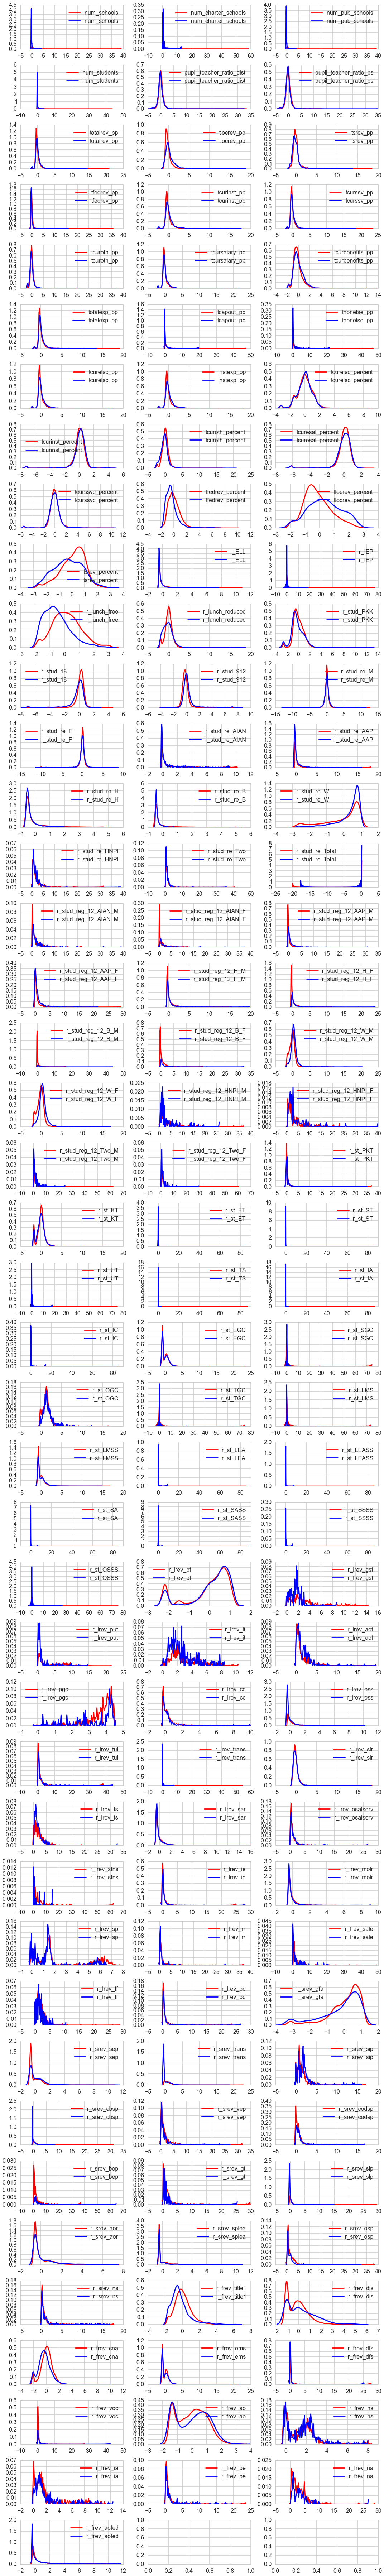

In [164]:
#Number of ccols from above divided by 3 gives the number of rows needed.  So for instance 126/3 = 42.
fig, axs = plt.subplots(43, 3, figsize=(15,100), tight_layout=True)

for item, ax in zip(dftouse[ccols], axs.flat):
    sns.kdeplot(dftouse[dftouse["RESP_High_Graduation"]==0][item], ax=ax, color='r')
    sns.kdeplot(dftouse[dftouse["RESP_High_Graduation"]==1][item], ax=ax, color='b')

We make histograms for each feature in INDICATORS.  Most of the separators have nearly all data points of one class on one value, which should help with the rate of false negatives.  The exception is i_ma_metropolitan.

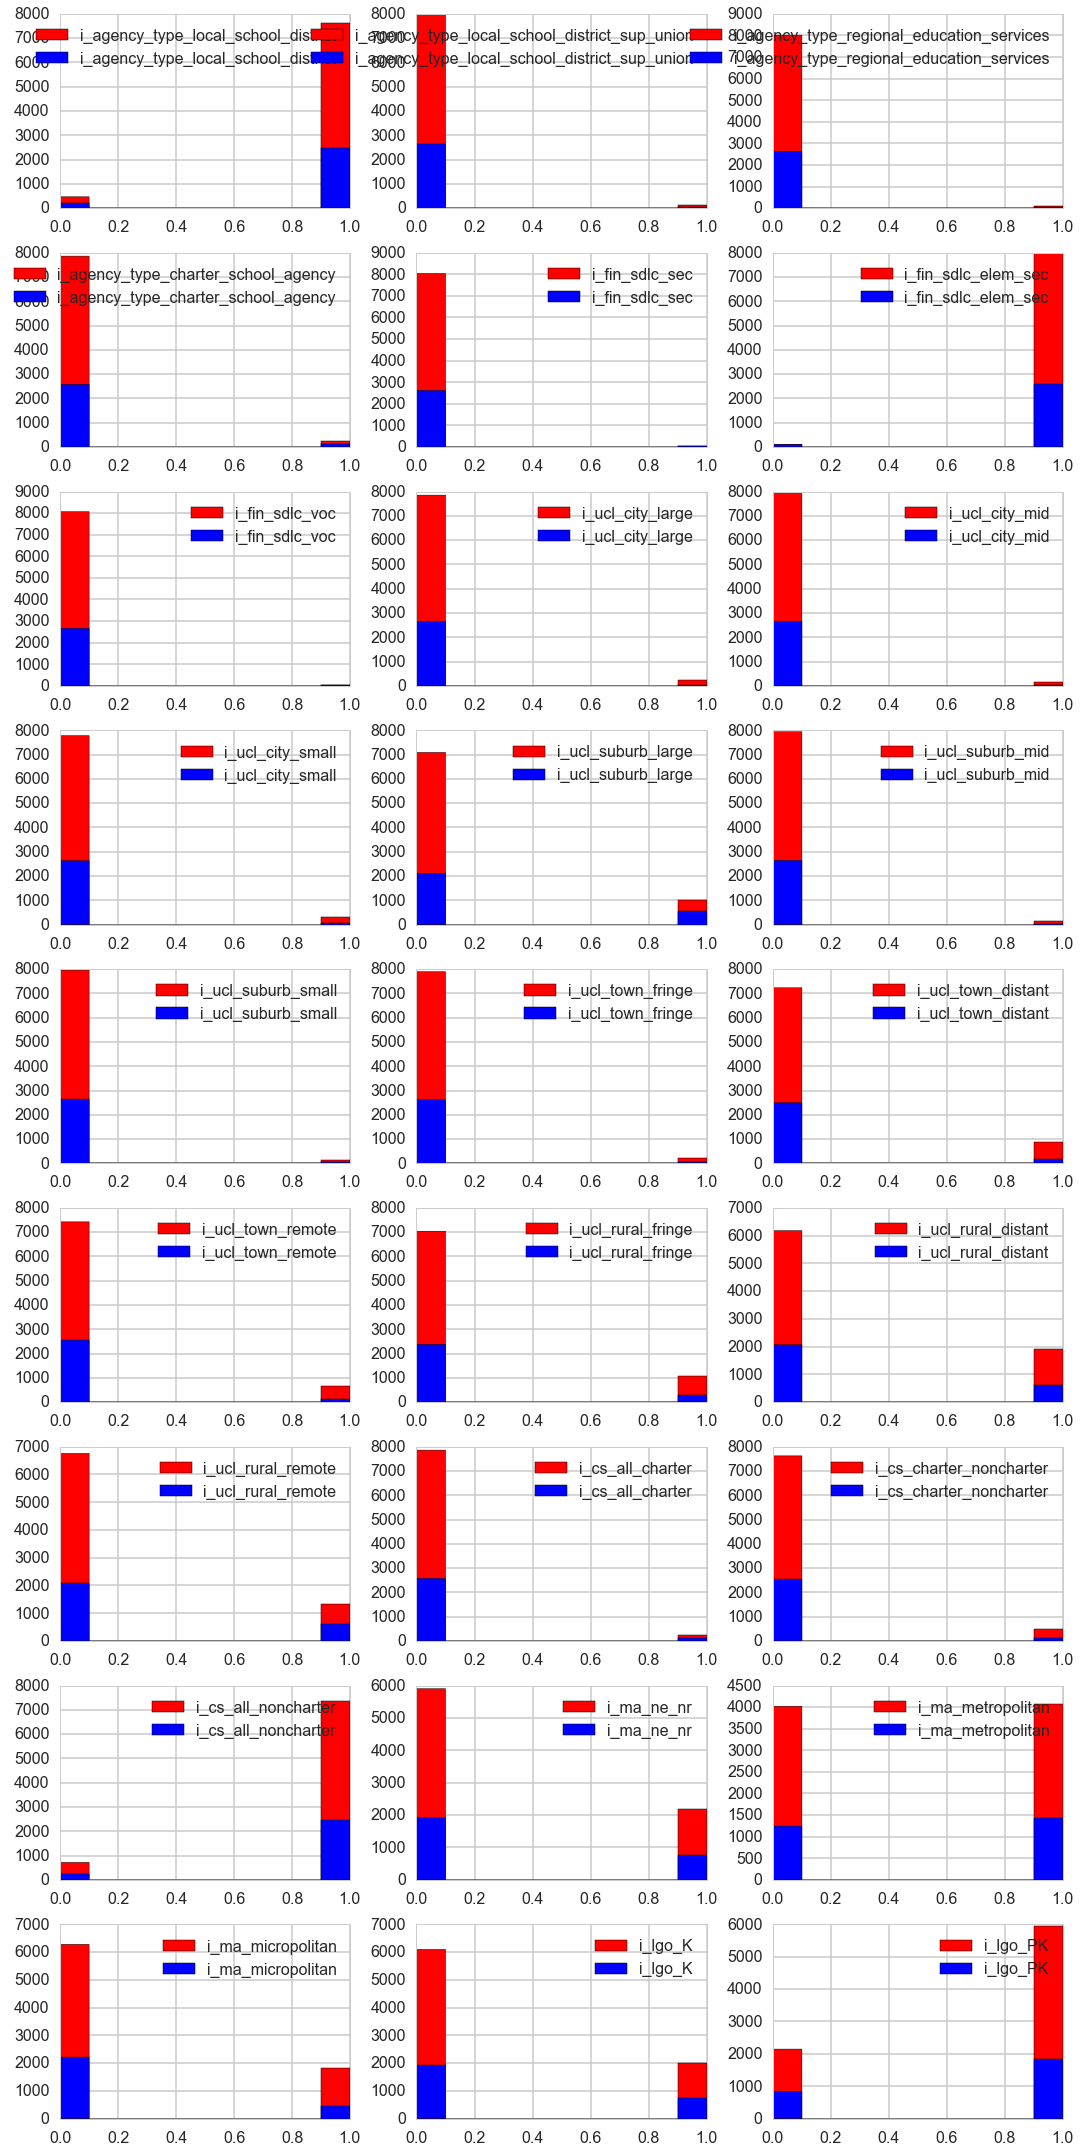

In [165]:
fig, axs = plt.subplots(9, 3, figsize=(15,30), tight_layout=True)

for item, ax in zip(dftouse[INDICATORS], axs.flat):
    dftouse[dftouse["RESP_High_Graduation"]==0][item].hist(ax=ax,color="r",label=item)
    dftouse[dftouse["RESP_High_Graduation"]==1][item].hist(ax=ax,color="b",label=item)
    ax.legend(loc='upper right')

### Writing Classifiers

#### High Graduation Rate

We try out many different types of classifiers to predict high graduation rate, RESP_High_Graduation.  We tried the classifiers from HW3 and Lab7.

We iteratively worked in this section and then determined more columns that needed to be removed, went back up to data filtering and exploratory analysis, then came back down to this section.

##### Linear SVM

In [166]:
#CITATION: From HW3
from sklearn.svm import LinearSVC

In [167]:
#CITATION: Adapted from HW3
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP_High_Graduation'].values

In [168]:
#CITATION: From HW3
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [169]:
#CITATION: From HW3
from sklearn.grid_search import GridSearchCV

In [170]:
#CITATION: From HW3
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [171]:
#CITATION: From HW3
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [232]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, 'RESP_High_Graduation',1, mask=mask)
#CITATION: Adapted from HW3

using mask
BEST {'C': 1.0} 0.795867002252 [mean: 0.76209, std: 0.00150, params: {'C': 0.001}, mean: 0.78090, std: 0.00466, params: {'C': 0.01}, mean: 0.79481, std: 0.00839, params: {'C': 0.1}, mean: 0.79587, std: 0.00533, params: {'C': 1.0}, mean: 0.78169, std: 0.00959, params: {'C': 10.0}, mean: 0.73877, std: 0.01239, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.80
[[2308  111]
 [ 551  266]]
########################################################
CPU times: user 52.8 s, sys: 472 ms, total: 53.3 s
Wall time: 54.2 s


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [173]:
#CITATION: From HW3
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [174]:
#CITATION: From HW3
ypred=clfsvm.predict(Xtest)
confusion_matrix(ytest, ypred)

array([[2312,  107],
       [ 551,  266]])

In [175]:
#CITATION: From HW3
print "OP=", ytest.sum(), ", ON=",ytest.shape[0] - ytest.sum()

OP= 817 , ON= 2419


##### Log Regression

In [176]:
#CITATION: From HW3
from sklearn.linear_model import LogisticRegression

In [177]:
%%time
clflog,_,_,_,_  = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, dftouse, lcols, 'RESP_High_Graduation', 1, reuse_split=reuse_split)
#CITATION: Adapted from HW3

using reuse split
BEST {'C': 1} 0.804874817857 [mean: 0.75242, std: 0.00020, params: {'C': 0.001}, mean: 0.77931, std: 0.00363, params: {'C': 0.01}, mean: 0.80117, std: 0.00243, params: {'C': 0.1}, mean: 0.80487, std: 0.00798, params: {'C': 1}, mean: 0.80289, std: 0.00637, params: {'C': 10}, mean: 0.80276, std: 0.00691, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.79
[[2229  190]
 [ 491  326]]
########################################################
CPU times: user 4min 26s, sys: 1.51 s, total: 4min 27s
Wall time: 4min 30s


In [179]:
#CITATION: From HW3
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

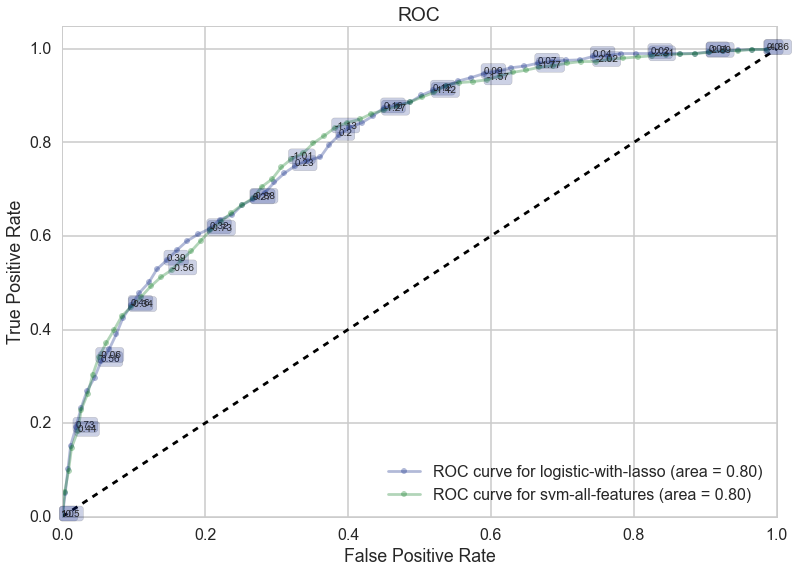

In [180]:
#CITATION: From HW3
with sns.color_palette("dark"):
    ax=make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=200, skip=50)
    make_roc("svm-all-features",clfsvm, ytest, Xtest, ax, labe=200, proba=False, skip=50);

##### Feature Selection

In [181]:
#CITATION: From HW3
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [182]:
#CITATION: From HW3
lasso_importances=nonzero_lasso(clflog)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(10)

abscoef      coef
feature                                                      
i_lgo_PK                                   2.183185  2.183185
r_st_IA                                    2.110106 -2.110106
i_lgo_K                                    2.101219  2.101219
num_schools                                1.443261 -1.443261
i_fin_sdlc_sec                             1.406411 -1.406411
i_agency_type_regional_education_services  1.301743 -1.301743
r_frev_ao                                  1.001184  1.001184
r_st_LEASS                                 0.917326  0.917326
r_frev_dis                                 0.851095  0.851095
r_stud_reg_12_W_M                          0.702855  0.702855

In [183]:
#CITATION: From HW3
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=dftouse[mask]
for col in lcols:
    r=pearsonr(dftousetrain[col], dftousetrain['RESP_High_Graduation'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

abscorr      corr
feature                                
r_lunch_free         0.291083 -0.291083
r_stud_reg_12_W_F    0.280307  0.280307
r_stud_reg_12_W_M    0.275477  0.275477
r_stud_912           0.224773  0.224773
r_stud_18            0.213686 -0.213686
tlocrev_percent      0.211366  0.211366
tfedrev_percent      0.184395 -0.184395
tlocrev_pp           0.177717  0.177717
tsrev_percent        0.162914 -0.162914
r_frev_dis           0.162470  0.162470
r_stud_re_W          0.161464  0.161464
r_stud_re_B          0.159342 -0.159342
r_frev_title1        0.157880 -0.157880
r_frev_cna           0.140797 -0.140797
r_srev_sep           0.128830  0.128830
r_stud_reg_12_AAP_M  0.128737  0.128737
r_stud_reg_12_AAP_F  0.121112  0.121112
r_stud_re_AAP        0.120424  0.120424
r_srev_gfa           0.111172 -0.111172
tcuroth_percent      0.110873 -0.110873
i_ucl_suburb_large   0.108931  0.108931
r_ELL                0.093748 -0.093748
instexp_pp           0.093090  0.093090
tcurinst_pp          0.093090  0.093090
r_stud_reg_12_B_F    0.089327 -0.089327

In [186]:
#CITATION: From HW3
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [187]:
#CITATION: From HW3
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals    

In [188]:
#CITATION: From HW3
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])

In [189]:
%%time
pipelinearsvm, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, 'RESP_High_Graduation',1, reuse_split=reuse_split)
#CITATION: From HW3

using reuse split
BEST {'svm__C': 1.0} 0.76261756524 [mean: 0.72049, std: 0.01425, params: {'svm__C': 1e-05}, mean: 0.75931, std: 0.00109, params: {'svm__C': 0.001}, mean: 0.76090, std: 0.00213, params: {'svm__C': 0.01}, mean: 0.76209, std: 0.00236, params: {'svm__C': 0.1}, mean: 0.76262, std: 0.00215, params: {'svm__C': 1.0}, mean: 0.75904, std: 0.00188, params: {'svm__C': 10.0}, mean: 0.74222, std: 0.03595, params: {'svm__C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.76
Accuracy on test data:     0.76
[[2385   34]
 [ 746   71]]
########################################################
CPU times: user 11 s, sys: 134 ms, total: 11.1 s
Wall time: 11.2 s


In [190]:
#CITATION: From HW3
np.array(lcols)[pipelinearsvm.get_params()['select'].get_support()]

array(['tlocrev_pp', 'tcurinst_pp', 'instexp_pp', 'tcuroth_percent',
       'tfedrev_percent', 'tlocrev_percent', 'tsrev_percent',
       'i_ucl_suburb_large', 'r_ELL', 'r_lunch_free', 'r_stud_18',
       'r_stud_912', 'r_stud_re_AAP', 'r_stud_re_B', 'r_stud_re_W',
       'r_stud_reg_12_AAP_M', 'r_stud_reg_12_AAP_F', 'r_stud_reg_12_B_F',
       'r_stud_reg_12_W_M', 'r_stud_reg_12_W_F', 'r_srev_gfa',
       'r_srev_sep', 'r_frev_title1', 'r_frev_dis', 'r_frev_cna'], 
      dtype='|S45')

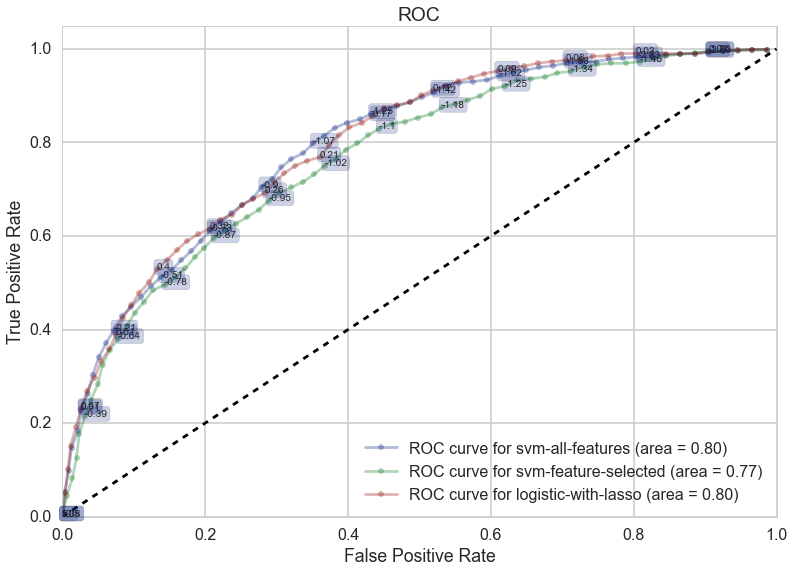

In [191]:
#CITATION: From HW3
with sns.color_palette("dark"):
    ax=make_roc("svm-all-features",clfsvm, ytest, Xtest, None, labe=250, proba=False, skip=50)
    make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax, labe=250, proba=False, skip=50);
    make_roc("logistic-with-lasso",clflog, ytest, Xtest, ax, labe=250, proba=True,  skip=50);

In [192]:
#CITATION: From HW3
jtrain=np.arange(0, ytrain.shape[0])
n_pos=len(jtrain[ytrain==1])
n_neg=len(jtrain[ytrain==0])
print n_pos, n_neg

1869 5680


In [193]:
#CITATION: From HW3
ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)

In [194]:
#CITATION: From HW3
alli=np.concatenate((jtrain[ytrain==1], ineg))
alli.shape

(3738,)

In [195]:
#CITATION: From HW3
Xtrain_new = Xtrain[alli]
ytrain_new = ytrain[alli]
Xtrain_new.shape, ytrain_new.shape

((3738, 154), (3738,))

In [196]:
#CITATION: From HW3
reuse_split_new=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)

In [197]:
%%time
clfsvm_b, _,_,_,_  = do_classify(LinearSVC(loss="hinge"), {"C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, 'RESP_High_Graduation',1, reuse_split=reuse_split_new)
#CITATION: From HW3

using reuse split
BEST {'C': 1.0} 0.740235420011 [mean: 0.68165, std: 0.01939, params: {'C': 1e-05}, mean: 0.71830, std: 0.02304, params: {'C': 0.001}, mean: 0.73649, std: 0.00928, params: {'C': 0.01}, mean: 0.73515, std: 0.01107, params: {'C': 0.1}, mean: 0.74024, std: 0.01348, params: {'C': 1.0}, mean: 0.73141, std: 0.02314, params: {'C': 10.0}, mean: 0.64660, std: 0.03716, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.77
Accuracy on test data:     0.70
[[1668  751]
 [ 235  582]]
########################################################
CPU times: user 18.3 s, sys: 149 ms, total: 18.5 s
Wall time: 18.6 s


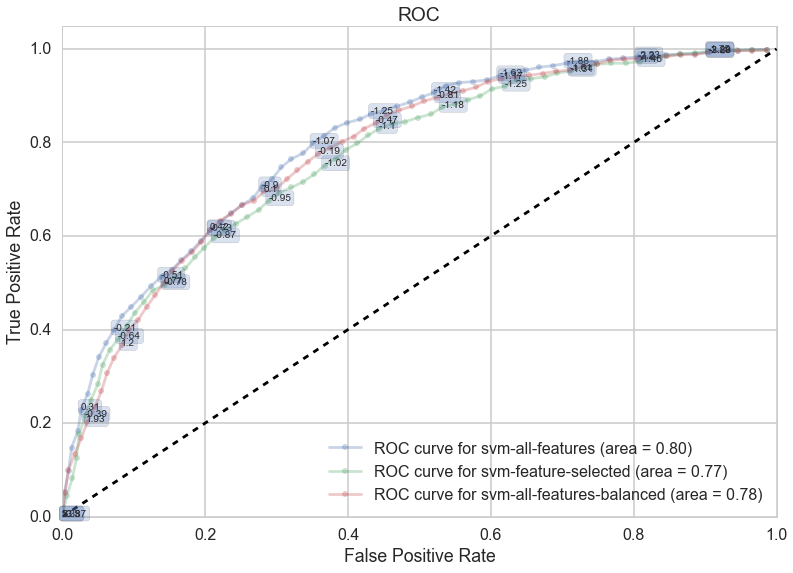

In [198]:
#CITATION: From HW3
ax = make_roc("svm-all-features",clfsvm, ytest, Xtest, None, labe=250, proba=False, skip=50)
make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax, labe=250, proba=False, skip=50);
make_roc("svm-all-features-balanced",clfsvm_b, ytest, Xtest, ax, labe=250, proba=False, skip=50);

##### Kernalized SVM

In [199]:
#CITATION: From HW3
from sklearn.svm import SVC

In [200]:
#CITATION: From HW3
selectorsvm2 = SelectKBest(k=25, score_func=pearson_scorer)
pipesvm2 = Pipeline([('select2', selectorsvm2), ('svm2', SVC())])

In [201]:
#CITATION: From HW3
jtrain_new=np.arange(0, ytrain_new.shape[0])
ipos_new = np.random.choice(jtrain_new[ytrain_new==1], 300, replace=False)
ineg_new = np.random.choice(jtrain_new[ytrain_new==0], 300, replace=False)
subsampled_i=np.concatenate((ipos_new,ineg_new))
Xtrain_new2=Xtrain_new[subsampled_i]
ytrain_new2=ytrain_new[subsampled_i]

In [202]:
#CITATION: From HW3
reuse_split_subsampled=dict(Xtrain=Xtrain_new2, Xtest=Xtest, ytrain=ytrain_new2, ytest=ytest)

In [203]:
%%time
pipesvm2, _,_,_,_  = do_classify(pipesvm2, {"svm2__C": [1e8],
                                              "svm2__gamma":[1e-5, 1e-7, 1e-9]}, 
                                 dftouse,lcols, 'RESP_High_Graduation',1, reuse_split=reuse_split_subsampled)
#CITATION: From HW3

using reuse split
BEST {'svm2__C': 100000000.0, 'svm2__gamma': 1e-07} 0.696666666667 [mean: 0.68167, std: 0.02134, params: {'svm2__C': 100000000.0, 'svm2__gamma': 1e-05}, mean: 0.69667, std: 0.03189, params: {'svm2__C': 100000000.0, 'svm2__gamma': 1e-07}, mean: 0.64167, std: 0.02415, params: {'svm2__C': 100000000.0, 'svm2__gamma': 1e-09}]
############# based on standard predict ################
Accuracy on training data: 0.73
Accuracy on test data:     0.68
[[1623  796]
 [ 238  579]]
########################################################
CPU times: user 9.37 s, sys: 47.2 ms, total: 9.42 s
Wall time: 9.49 s


In [204]:
#CITATION: From HW3
gamma_wanted=pipesvm2.get_params()['svm2__gamma']
C_chosen=pipesvm2.get_params()['svm2__C']
print gamma_wanted, C_chosen
selectorsvm3 = SelectKBest(k=25, score_func=pearson_scorer)
pipesvm3 = Pipeline([('select3', selectorsvm3), ('svm3', SVC(C=C_chosen, gamma=gamma_wanted))])
pipesvm3, _,_,_,_  = do_classify(pipesvm3, None, 
                                 dftouse,lcols, 'RESP_High_Graduation',1, reuse_split=reuse_split_new)

1e-07 100000000.0
using reuse split
############# based on standard predict ################
Accuracy on training data: 0.73
Accuracy on test data:     0.70
[[1678  741]
 [ 242  575]]
########################################################


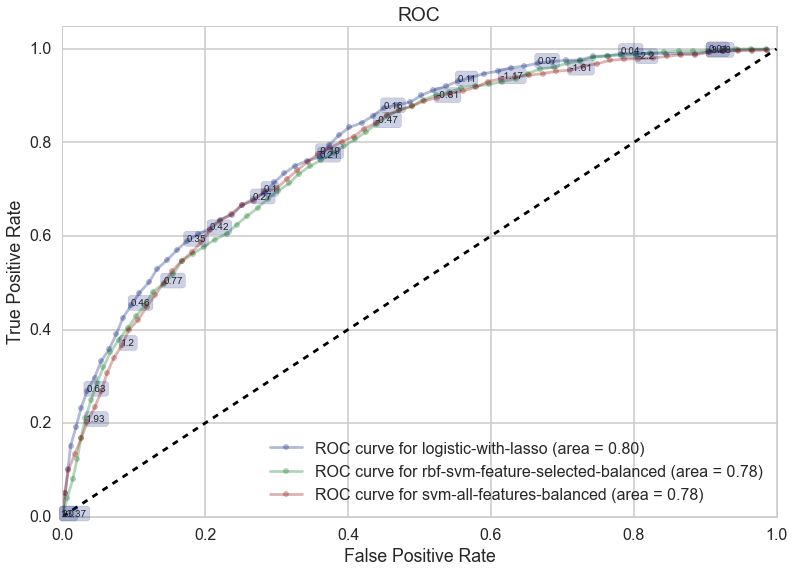

In [205]:
#CITATION: From HW3
with sns.color_palette("dark"):
    ax = make_roc("logistic-with-lasso",clflog, ytest, Xtest, None, labe=300, skip=50)
    make_roc("rbf-svm-feature-selected-balanced",pipesvm3, ytest, Xtest, ax, labe=None, proba=False, skip=50);
    make_roc("svm-all-features-balanced",clfsvm_b, ytest, Xtest, ax, labe=250, proba=False, skip=50);

In [233]:
Xtraina = Xtrain 
ytraina = ytrain 
Xtesta = Xtest 
ytesta = ytest

##### Decision Trees

In [207]:
Xnames = [
    'num_schools',
    'num_charter_schools',
    'num_pub_schools',
    'pupil_teacher_ratio_dist',
    'totalrev_pp',
    'tcurinst_pp',
    'tcurssv_pp',
    'tcuroth_pp',
    'tcursalary_pp',
    'tcurbenefits_pp',
    'totalexp_pp',
    'r_stud_re_AAP',
    'r_stud_re_H',
    'r_stud_re_B',
    'r_stud_re_W'
]

# Indicators used : Funding/Expenditure/Location/School Types and Race/Sex
Xnames1 = [
    'pupil_teacher_ratio_dist',
            'totalrev_pp',
            'tcurinst_pp',
            'tcurssv_pp',
            'tcursalary_pp',
            'tcurbenefits_pp',
            'totalexp_pp',
            'tcapout_pp',
            'tnonelse_pp',
            'tcurelsc_pp',
            'instexp_pp',
            'i_agency_type_local_school_district',
            'i_agency_type_local_school_district_sup_union',
            'i_agency_type_regional_education_services',
            'i_agency_type_charter_school_agency',
            'i_fin_sdlc_sec',
            'i_fin_sdlc_elem_sec',
            'i_fin_sdlc_voc',
            'i_ucl_city_large',
            'i_ucl_city_mid',
            'i_ucl_city_small',
            'i_ucl_suburb_large',
            'i_ucl_suburb_mid',
            'i_ucl_suburb_small',
            'i_ucl_town_fringe',
            'i_ucl_town_distant',
            'i_ucl_town_remote',
            'i_ucl_rural_fringe',
            'i_ucl_rural_distant',
            'i_ucl_rural_remote',
            'i_cs_all_charter',
            'i_cs_charter_noncharter',
            'i_cs_all_noncharter',
            'i_ma_ne_nr',
            'i_ma_metropolitan',
            'i_ma_micropolitan',            
            'r_ELL',
            'r_IEP',
            'r_stud_re_M',
            'r_stud_re_F',
            'r_stud_re_AIAN',
            'r_stud_re_AAP',
            'r_stud_re_H',
            'r_stud_re_B',
            'r_stud_re_W',
            'r_stud_re_HNPI',
            'r_stud_re_Two'   
]


# RESP_High_Graduation
# RESP_Low_Graduation
target = 'RESP_High_Graduation'
target1 = 'RESP_Low_Graduation'

In [214]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [215]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

using mask


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_depth': 7, 'min_samples_leaf': 6} 0.457737067383 [mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 7}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 8}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 9}, mean: 0.42966, std: 0.01906, params: {'max_depth': 1, 'min_samples_leaf': 10}, mean: 0.42966, std: 0.01906, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.42966, std: 0.01906, params: {'max_depth': 2, 'min_samples_leaf': 2}, me

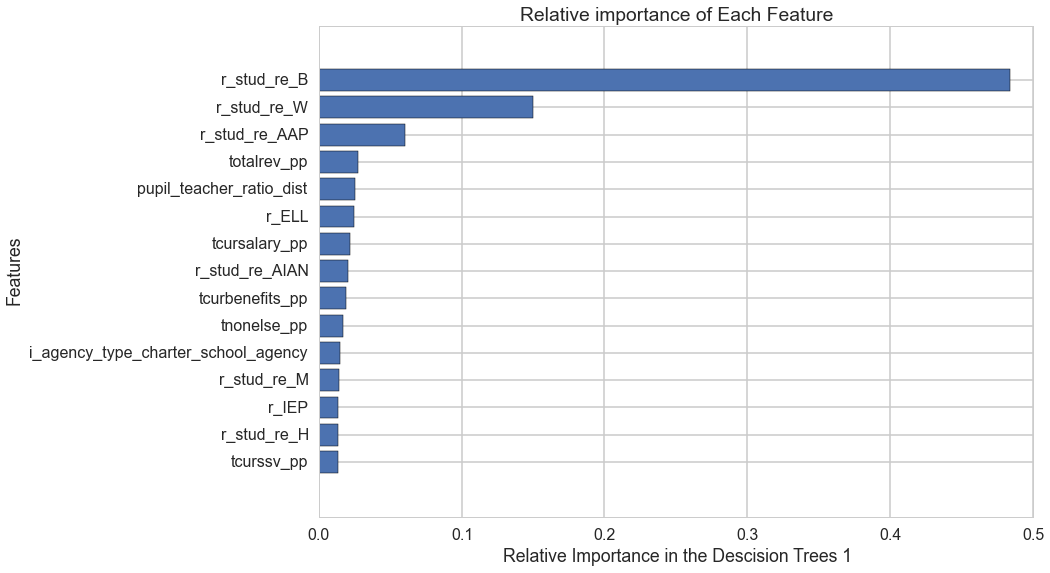

In [216]:
# Descision Trees
from sklearn import tree

clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, dftouse, 
                                                     Xnames1, target1, 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

importance_list = clfTree1.feature_importances_
name_list = dftouse[Xnames1].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list))[-15:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Descision Trees 1')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

##### Random Forests

using mask


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 7} 0.463701727422 [mean: 0.40555, std: 0.02153, params: {'n_estimators': 1}, mean: 0.33206, std: 0.01773, params: {'n_estimators': 2}, mean: 0.44917, std: 0.01558, params: {'n_estimators': 3}, mean: 0.37175, std: 0.02860, params: {'n_estimators': 4}, mean: 0.45278, std: 0.02231, params: {'n_estimators': 5}, mean: 0.43239, std: 0.01643, params: {'n_estimators': 6}, mean: 0.46370, std: 0.01889, params: {'n_estimators': 7}, mean: 0.41731, std: 0.01211, params: {'n_estimators': 8}, mean: 0.45206, std: 0.01475, params: {'n_estimators': 9}]
############# based on standard predict ################
Accuracy on training data: 0.98
Accuracy on test data:     0.77
[[2192  240]
 [ 507  297]]
########################################################


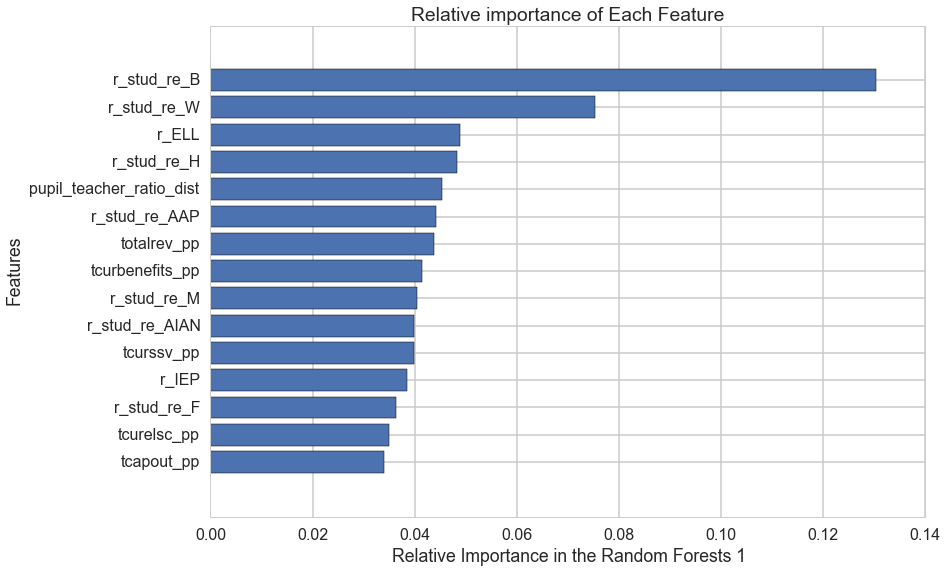

In [234]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

clfForest1 = RandomForestClassifier()

parameters = {"n_estimators": range(1, 10)}
clfForest1, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest1, parameters, 
                                                       dftouse, Xnames1, target1, 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

importance_list = clfForest1.feature_importances_
name_list = dftouse[Xnames1].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list))[-15:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forests 1')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

##### ADA Booster

using mask


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 59} 0.48989641689 [mean: 0.46457, std: 0.02103, params: {'n_estimators': 10}, mean: 0.46717, std: 0.02023, params: {'n_estimators': 11}, mean: 0.46320, std: 0.02140, params: {'n_estimators': 12}, mean: 0.46886, std: 0.02231, params: {'n_estimators': 13}, mean: 0.46604, std: 0.01842, params: {'n_estimators': 14}, mean: 0.46865, std: 0.02018, params: {'n_estimators': 15}, mean: 0.46858, std: 0.02063, params: {'n_estimators': 16}, mean: 0.46955, std: 0.01665, params: {'n_estimators': 17}, mean: 0.47113, std: 0.01787, params: {'n_estimators': 18}, mean: 0.46937, std: 0.01481, params: {'n_estimators': 19}, mean: 0.47001, std: 0.01840, params: {'n_estimators': 20}, mean: 0.47373, std: 0.01664, params: {'n_estimators': 21}, mean: 0.47721, std: 0.01993, params: {'n_estimators': 22}, mean: 0.47457, std: 0.01786, params: {'n_estimators': 23}, mean: 0.47408, std: 0.01565, params: {'n_estimators': 24}, mean: 0.47490, std: 0.01618, params: {'n_estimators': 25}, mean: 0.47605, 

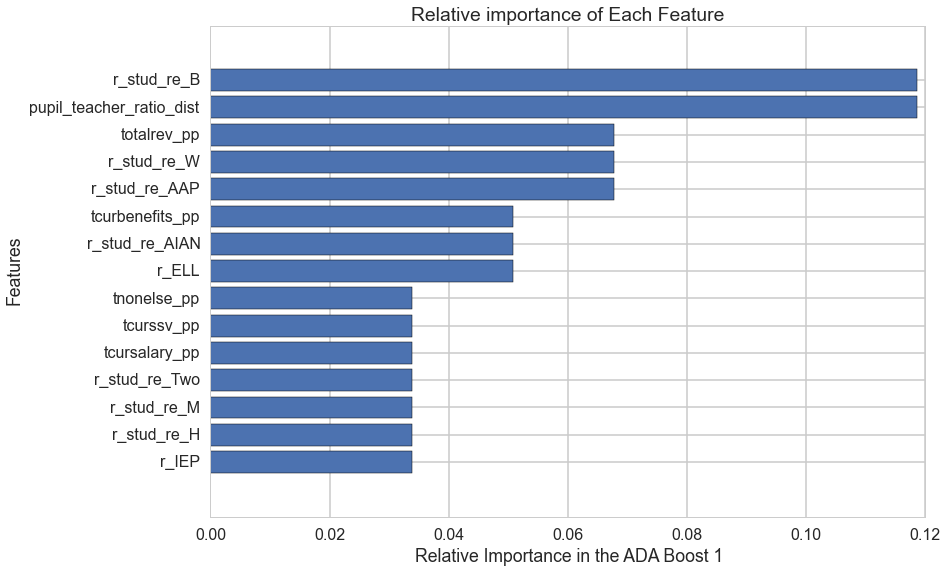

In [219]:
from sklearn.ensemble import AdaBoostClassifier

clfAda1 = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda1, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda1, parameters, 
                                                       dftouse, Xnames1, target1, 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

importance_list = clfAda1.feature_importances_
name_list = dftouse[Xnames1].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list))[-15:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the ADA Boost 1')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

##### Gradient Boosting

using mask


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 43, 'max_depth': 5} 0.479599331331 [mean: 0.39888, std: 0.01921, params: {'n_estimators': 30, 'max_depth': 1}, mean: 0.40371, std: 0.01937, params: {'n_estimators': 31, 'max_depth': 1}, mean: 0.40517, std: 0.01818, params: {'n_estimators': 32, 'max_depth': 1}, mean: 0.40340, std: 0.01738, params: {'n_estimators': 33, 'max_depth': 1}, mean: 0.40517, std: 0.01836, params: {'n_estimators': 34, 'max_depth': 1}, mean: 0.41058, std: 0.01316, params: {'n_estimators': 35, 'max_depth': 1}, mean: 0.40922, std: 0.01490, params: {'n_estimators': 36, 'max_depth': 1}, mean: 0.40997, std: 0.01598, params: {'n_estimators': 37, 'max_depth': 1}, mean: 0.40948, std: 0.01778, params: {'n_estimators': 38, 'max_depth': 1}, mean: 0.41058, std: 0.01464, params: {'n_estimators': 39, 'max_depth': 1}, mean: 0.40938, std: 0.01438, params: {'n_estimators': 40, 'max_depth': 1}, mean: 0.40966, std: 0.01556, params: {'n_estimators': 41, 'max_depth': 1}, mean: 0.40997, std: 0.01525, params: {'n_e

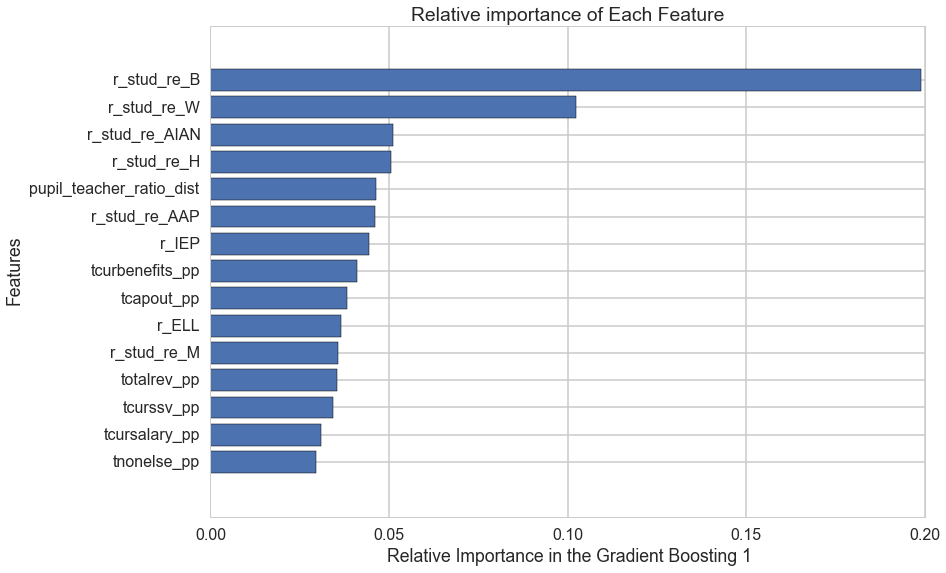

In [221]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

clfGB1 = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB1, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB1, parameters, 
                                                       dftouse, Xnames1, target1, 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

importance_list = clfGB1.feature_importances_
name_list = dftouse[Xnames1].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list))[-15:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Gradient Boosting 1')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

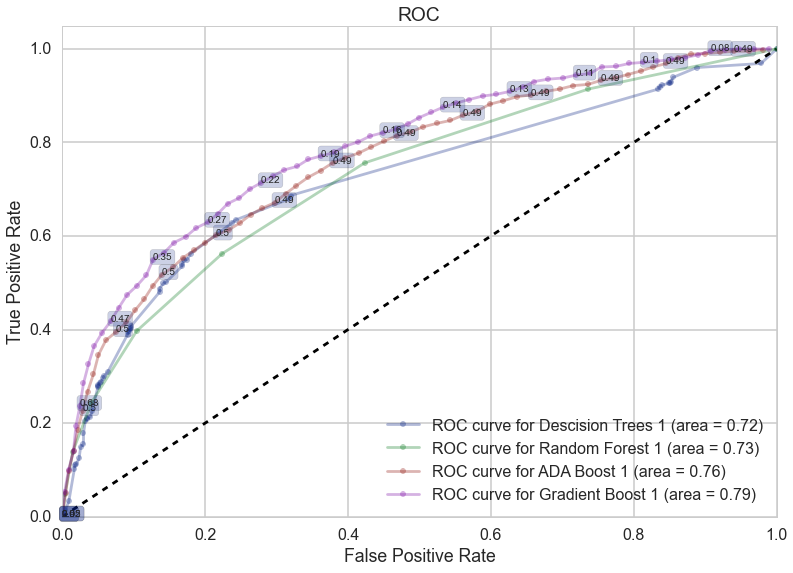

In [222]:
# Plotting ROC Curves

with sns.color_palette("dark"):
    ax=make_roc("Descision Trees 1",clfTree1  , ytest, Xtest, None, labe=250, proba=True)
    make_roc("Random Forest 1"     ,clfForest1, ytest, Xtest, ax  , labe=250, proba=True);
    make_roc("ADA Boost 1"         ,clfAda1   , ytest, Xtest, ax  , labe=250, proba=True, skip=50);
    make_roc("Gradient Boost 1"    ,clfGB1    , ytest, Xtest, ax  , labe=250, proba=True, skip=50);

In [235]:
Xtrainb = Xtrain 
ytrainb = ytrain 
Xtestb = Xtest 
ytestb = ytest

##### Decision Tree - No Gender or Ethnicity

In [223]:
# Indicators used : Funding/Expenditure/Location/School Types (no Race)

Xnames2 = [
            'pupil_teacher_ratio_dist',
            'totalrev_pp',
            'tcurinst_pp',
            'tcurssv_pp',
            'tcursalary_pp',
            'tcurbenefits_pp',
            'totalexp_pp',
            'tcapout_pp',
            'tnonelse_pp',
            'tcurelsc_pp',
            'instexp_pp',
            'i_agency_type_local_school_district',
            'i_agency_type_local_school_district_sup_union',
            'i_agency_type_regional_education_services',
            'i_agency_type_charter_school_agency',
            'i_fin_sdlc_sec',
            'i_fin_sdlc_elem_sec',
            'i_fin_sdlc_voc',
            'i_ucl_city_large',
            'i_ucl_city_mid',
            'i_ucl_city_small',
            'i_ucl_suburb_large',
            'i_ucl_suburb_mid',
            'i_ucl_suburb_small',
            'i_ucl_town_fringe',
            'i_ucl_town_distant',
            'i_ucl_town_remote',
            'i_ucl_rural_fringe',
            'i_ucl_rural_distant',
            'i_ucl_rural_remote',
            'i_cs_all_charter',
            'i_cs_charter_noncharter',
            'i_cs_all_noncharter',
            'i_ma_ne_nr',
            'i_ma_metropolitan',
            'i_ma_micropolitan',            
            'r_ELL',
            'r_IEP'
]

# RESP_High_Graduation
# RESP_Low_Graduation

target2 = 'RESP_High_Graduation'

using mask


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'max_depth': 7, 'min_samples_leaf': 10} 0.265152329971 [mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 7}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 8}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 9}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 10}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.00000, std: 0.00000, params: {'max_depth': 2, 'min_samples_leaf': 2}, m

/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


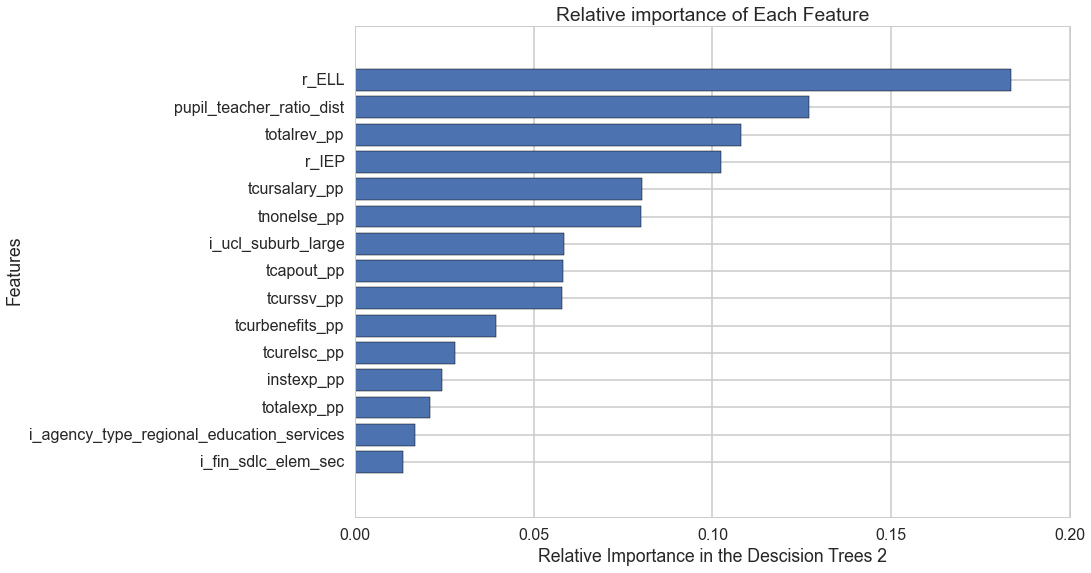

In [236]:
# Descision Tree
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, dftouse, 
                                                     Xnames2, target2, 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

importance_list = clfTree2.feature_importances_
name_list = dftouse[Xnames2].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list))[-15:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Descision Trees 2')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

##### Random Forests - No Gender/Ethnicity

using mask


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 1} 0.336064588194 [mean: 0.33606, std: 0.01695, params: {'n_estimators': 1}, mean: 0.19211, std: 0.03886, params: {'n_estimators': 2}, mean: 0.31665, std: 0.01348, params: {'n_estimators': 3}, mean: 0.21522, std: 0.02015, params: {'n_estimators': 4}, mean: 0.27902, std: 0.01971, params: {'n_estimators': 5}, mean: 0.23730, std: 0.03204, params: {'n_estimators': 6}, mean: 0.29133, std: 0.01199, params: {'n_estimators': 7}, mean: 0.22762, std: 0.01583, params: {'n_estimators': 8}, mean: 0.29514, std: 0.01912, params: {'n_estimators': 9}]
############# based on standard predict ################
Accuracy on training data: 0.88
Accuracy on test data:     0.64
[[1801  618]
 [ 559  258]]
########################################################


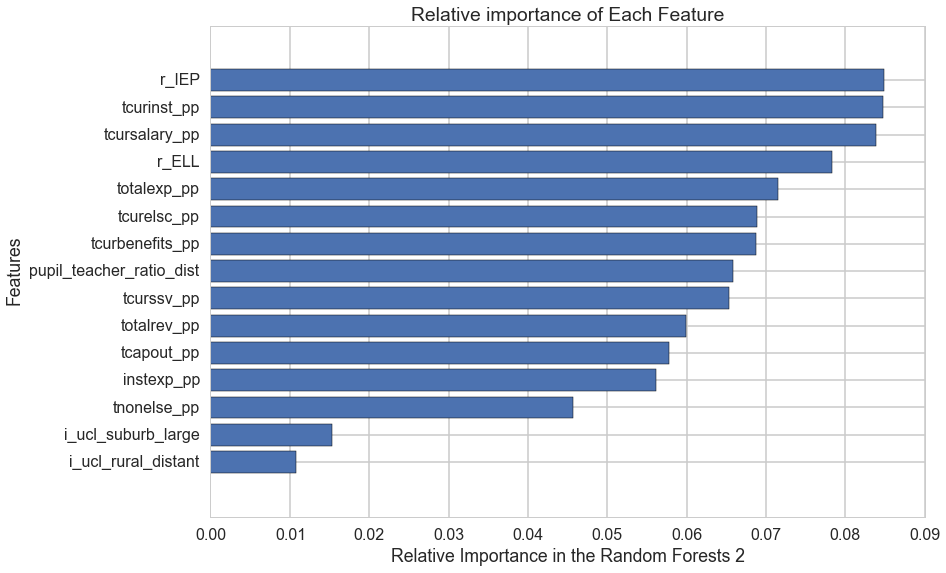

In [226]:
# Random Forests
clfForest2 = RandomForestClassifier()

parameters = {"n_estimators": range(1, 10)}
clfForest2, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest2, parameters, 
                                                       dftouse, Xnames2, target2, 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

importance_list = clfForest2.feature_importances_
name_list = dftouse[Xnames2].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list))[-15:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forests 2')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

##### ADA Booster - No Gender/Ethnicity

using mask


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 58} 0.159437681138 [mean: 0.09999, std: 0.01720, params: {'n_estimators': 10}, mean: 0.09992, std: 0.00482, params: {'n_estimators': 11}, mean: 0.09388, std: 0.01484, params: {'n_estimators': 12}, mean: 0.10353, std: 0.00566, params: {'n_estimators': 13}, mean: 0.09725, std: 0.00717, params: {'n_estimators': 14}, mean: 0.10481, std: 0.01642, params: {'n_estimators': 15}, mean: 0.10665, std: 0.01209, params: {'n_estimators': 16}, mean: 0.11619, std: 0.01102, params: {'n_estimators': 17}, mean: 0.10536, std: 0.01676, params: {'n_estimators': 18}, mean: 0.10077, std: 0.01719, params: {'n_estimators': 19}, mean: 0.10759, std: 0.01932, params: {'n_estimators': 20}, mean: 0.10991, std: 0.00703, params: {'n_estimators': 21}, mean: 0.11557, std: 0.01572, params: {'n_estimators': 22}, mean: 0.11473, std: 0.01596, params: {'n_estimators': 23}, mean: 0.12906, std: 0.00992, params: {'n_estimators': 24}, mean: 0.12496, std: 0.01033, params: {'n_estimators': 25}, mean: 0.13429,

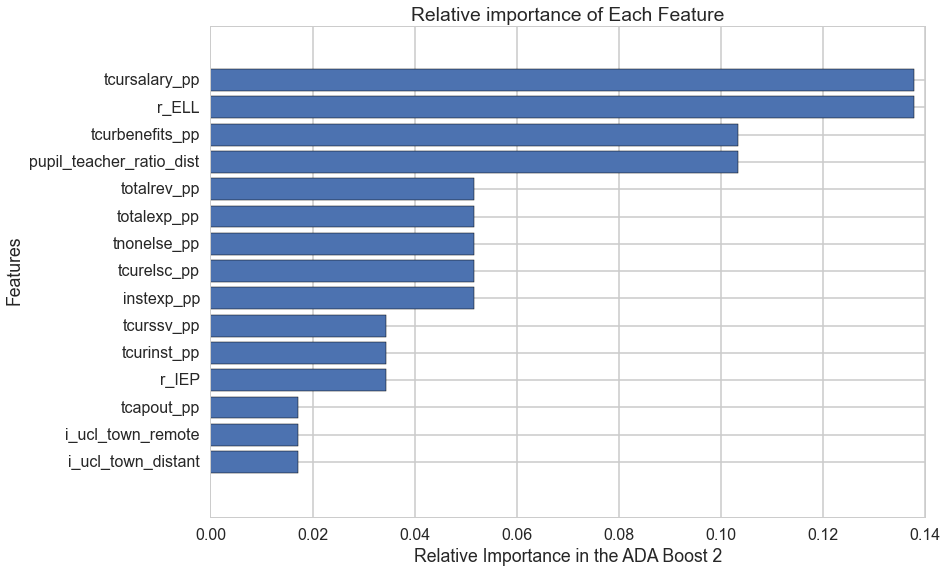

In [227]:
# ADA Booster
clfAda2 = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda2, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda2, parameters, 
                                                       dftouse, Xnames2, target2, 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

importance_list = clfAda2.feature_importances_
name_list = dftouse[Xnames2].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list))[-15:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the ADA Boost 2')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

##### Gradient Boosting - No Gender/Ethnicity

using mask


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 54, 'max_depth': 5} 0.236796901539 [mean: 0.00000, std: 0.00000, params: {'n_estimators': 30, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 31, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 32, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 33, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 34, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 35, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 36, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 37, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 38, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 39, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 40, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_estimators': 41, 'max_depth': 1}, mean: 0.00000, std: 0.00000, params: {'n_e

/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


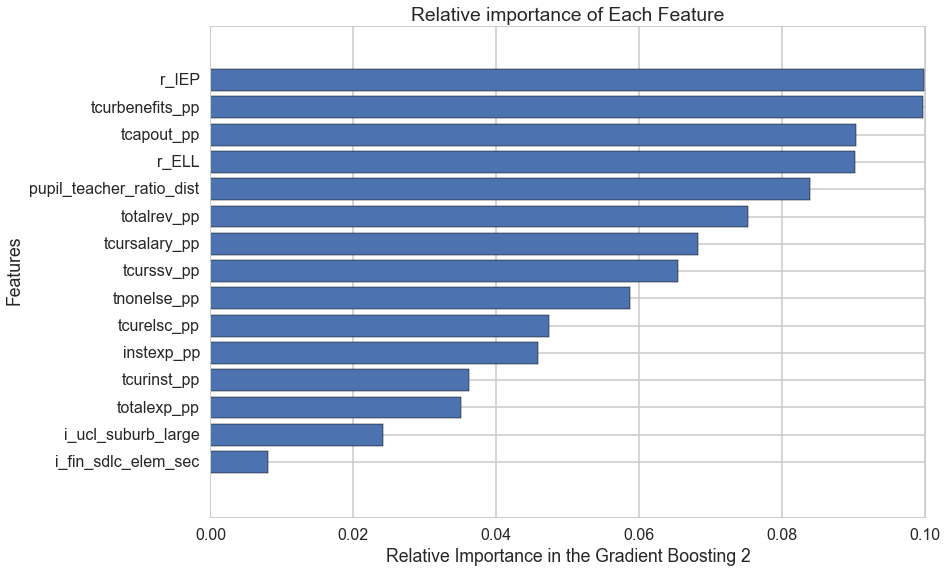

In [228]:
# Gradient Boosting
clfGB2 = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB2, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB2, parameters, 
                                                       dftouse, Xnames2, target2, 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

importance_list = clfGB2.feature_importances_
name_list = dftouse[Xnames2].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list))[-15:])
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Gradient Boosting 2')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

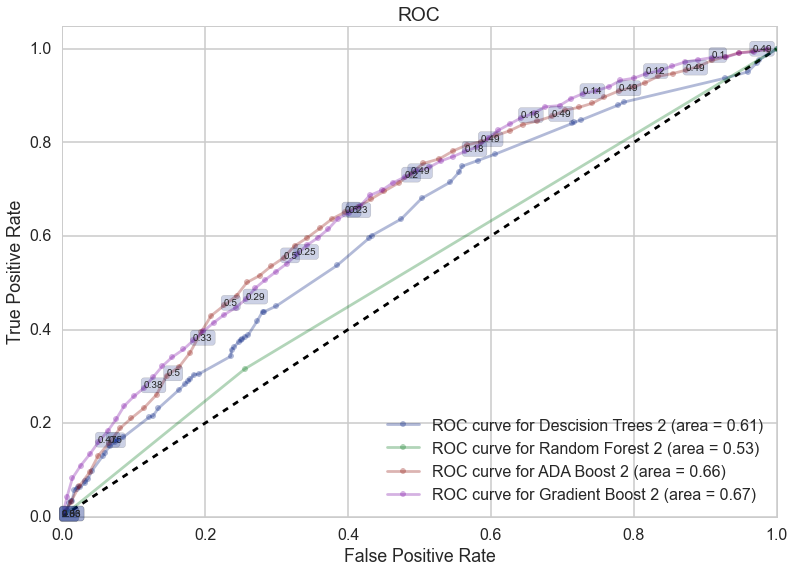

In [229]:
with sns.color_palette("dark"):
    ax=make_roc("Descision Trees 2",clfTree2  , ytest, Xtest, None, labe=250, proba=True)
    make_roc("Random Forest 2"     ,clfForest2, ytest, Xtest, ax  , labe=250, proba=True);
    make_roc("ADA Boost 2"         ,clfAda2   , ytest, Xtest, ax  , labe=250, proba=True, skip=50);
    make_roc("Gradient Boost 2"    ,clfGB2    , ytest, Xtest, ax  , labe=250, proba=True, skip=50);

In [237]:
Xtrainc = Xtrain 
ytrainc = ytrain 
Xtestc = Xtest 
ytestc = ytest

#### Final Comparison of All Models

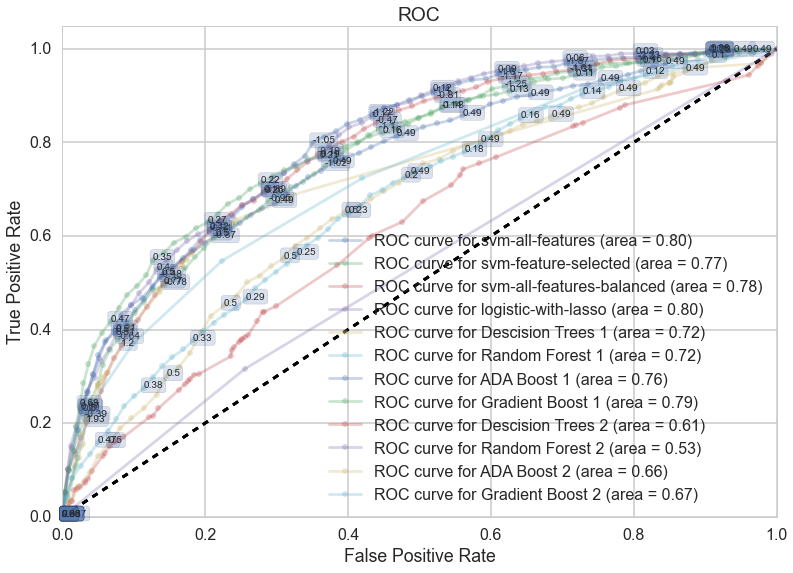

In [238]:
ax = make_roc("svm-all-features",clfsvm, ytesta, Xtesta, None, labe=250, proba=False, skip=50)
make_roc("svm-feature-selected",pipelinearsvm, ytesta, Xtesta, ax, labe=250, proba=False, skip=50);
make_roc("svm-all-features-balanced",clfsvm_b, ytesta, Xtesta, ax, labe=250, proba=False, skip=50);
make_roc("logistic-with-lasso",clflog, ytesta, Xtesta, ax, labe=250, proba=True,  skip=50);
make_roc("Descision Trees 1",clfTree1  , ytestb, Xtestb, None, labe=250, proba=True)
make_roc("Random Forest 1"     ,clfForest1, ytestb, Xtestb, ax  , labe=250, proba=True);
make_roc("ADA Boost 1"         ,clfAda1   , ytestb, Xtestb, ax  , labe=250, proba=True, skip=50);
make_roc("Gradient Boost 1"    ,clfGB1    , ytestb, Xtestb, ax  , labe=250, proba=True, skip=50);
make_roc("Descision Trees 2",clfTree2  , ytestc, Xtestc, None, labe=250, proba=True)
make_roc("Random Forest 2"     ,clfForest2, ytestc, Xtestc, ax  , labe=250, proba=True);
make_roc("ADA Boost 2"         ,clfAda2   , ytestc, Xtestc, ax  , labe=250, proba=True, skip=50);
make_roc("Gradient Boost 2"    ,clfGB2    , ytestc, Xtestc, ax  , labe=250, proba=True, skip=50);

## Low Graduation

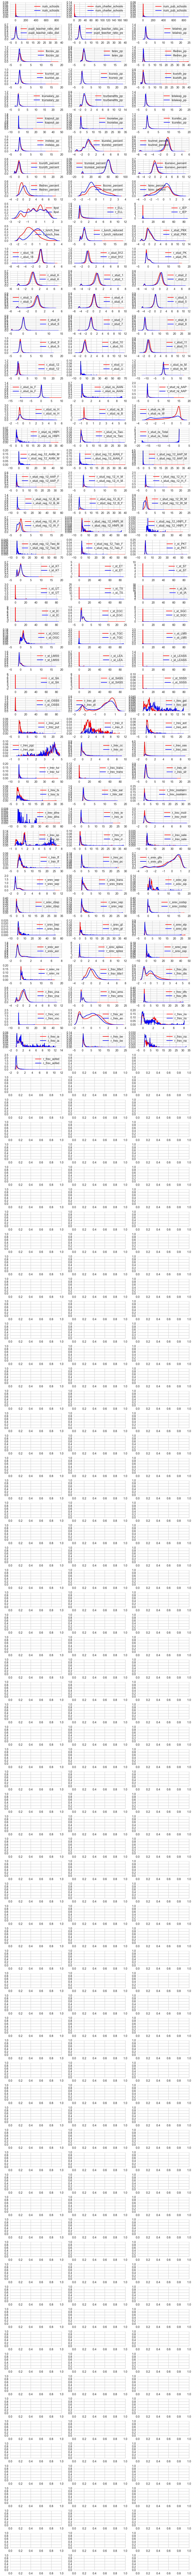

In [84]:
fig, axs = plt.subplots(115, 3, figsize=(15,200), tight_layout=True)

for item, ax in zip(dftouse[ccols], axs.flat):
    sns.kdeplot(dftouse[dftouse["RESP_Low_Graduation"]==0][item], ax=ax, color='r')
    sns.kdeplot(dftouse[dftouse["RESP_Low_Graduation"]==1][item], ax=ax, color='b')

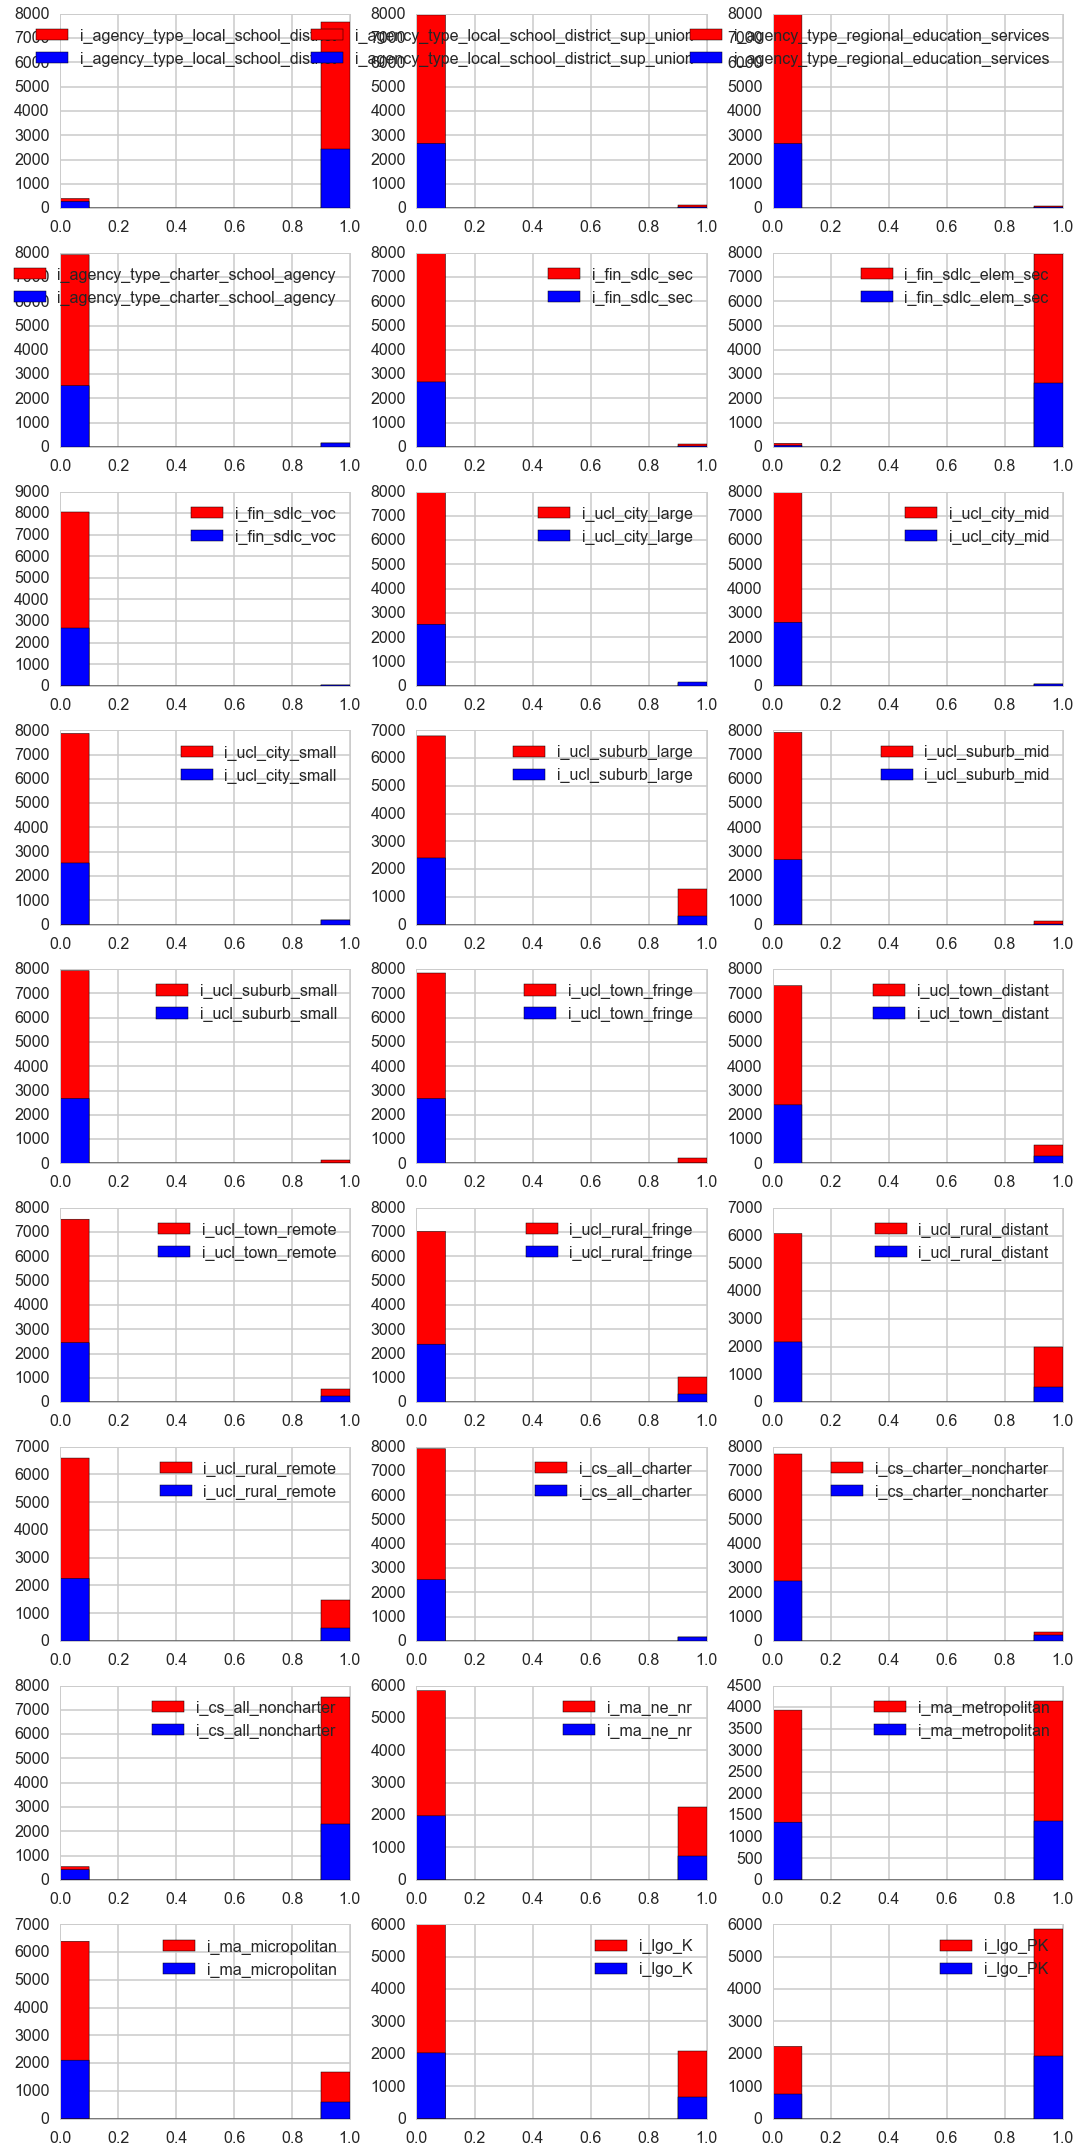

In [85]:
fig, axs = plt.subplots(9, 3, figsize=(15,30), tight_layout=True)

for item, ax in zip(dftouse[INDICATORS], axs.flat):
    dftouse[dftouse["RESP_Low_Graduation"]==0][item].hist(ax=ax,color="r",label=item)
    dftouse[dftouse["RESP_Low_Graduation"]==1][item].hist(ax=ax,color="b",label=item)
    ax.legend(loc='upper right')